In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.text import Text
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency, spearmanr
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
import time
warnings.filterwarnings('ignore')

C:\Users\foulo\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1>CSS Stylesheet</h1>

<style>
    /* Define CSS styles here */
    h1 {
        color: blue;
    }
    p {
        font-size: 16px;
        font-weight: bold;
    }
    .custom-class {
        background-color: yellow;
        border: 1px solid black;
        padding: 10px;
    }
</style>

In [2]:
css_style = """
h1 {
    color: black;
    font-family: 'Segoe UI', 'Gill Sans MT', Calibri, 'Trebuchet MS', sans-serif;
    font-size: 35px !important;
    padding-bottom: 10px;
    padding-top: 10px;
    border-bottom: 5px solid navy;
    border-top: 5px solid navy;
    font-variant: small-caps;
    text-align: center;
    margin-bottom: 25px;
}

h3 {
    color : dimgray;    
}

.all {
/*This class is the default class for <div> so it does not interact with jupyter notebook structure */
text-align: justify;
font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
margin-right: 2px;
}

.titlediv {
    /*This class is the default class for <div> so it does not interact with jupyter notebook structure */
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border: 5px solid navy;
    padding-top: 30px;
    padding-bottom: 30px;
    padding-left: 5px;
    padding-right: 5px;
    margin-bottom: 10px;
    }

.titlediv_2 {
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    text-align: center !important;
    }

.titlep {
    font-size : 50px;
    text-align: center !important;
    font-variant: small-caps;
}   

.titlep_2 {
    font-size : 30px;
    text-align: center !important;
    margin-top: 10px;
}  

.title_sp {
    text-align: center !important;
    font-size: 20px !important;
    font-weight: bold;
}

.signature {
    margin-top: 60px;
    padding-top: 15px;
    border-top: 2px solid black;
    text-align: right !important;
    font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
}

.obj {
    text-align: justify;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    margin-right: 100px;
    border: 2px solid lightcoral;
    padding: 15px;
}

p {
    text-align: justify !important;
}

.intro {
    font-style: italic;
}

.conclusion {
    border: 5px solid navy;
    margin-top: 50px;
    padding: 10px;
}

.conclusion h3 {
    color:black;
    font-variant: small-caps;
}

.small-caps {
    font-variant: small-caps;
}

table {
    margin-right: 10px !important;
    font-size: 14px !important;
    text-align: center !important;
}

.table_1 {
    border: 3px solid black !important;
    width: 100% !important;
}

.table_1 td, .table_1, th {
    border: 1px solid black;
}

.head_tr {
    background-color: dimgray !important;
    color: white;
    border: 3px solid black !important;
}

th, td {
    padding: 8px !important;
    text-align: center !important;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border: 1.5px solid black; 
}


.recap_table td, .recap_table th {
    height: 50px;
    width: 180px;
}

.recap_table th {
    font-size: 18px;
}

.col_1 {
    text-align: right !important;
    width: 50 !important;
}

.col_group {
    width: 200px;
    background-color: #d4c9df !important;
    text-align: center;
    height: 5px !important;
    font-size: 16 !important;
    font-weight: bold;
}

.columns {
    display: flex;
    flex-wrap: wrap;
}

.column {
    flex: 1;
    padding: 10px;
    text-align: justify;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    margin-right: 50px;
}
"""
    
HTML(f'<style>{css_style}</style>')

In [3]:
df_origin = pd.read_csv('cardio_train.csv', sep = ';').set_index('id')  # The purpose of this df is to keep a version of the dataset, it should therefore not be modified.
df_raw = pd.read_csv('clean_cvd.csv', sep = ",")

<h4>Code for: Preliminary Work</h4>

In [4]:
display(HTML(f"""
<div class = 'all'>
    <h1>Preliminary Work</h1>
    <p class = 'intro'>
    This section provides an overview of the project, a summary of part I (data processing and
    conclusions).
    </p>
    <p style = 'border-left: 3px solid silver; padding-left: 5px; font-size : 12.5px; font-style: italic; margin-left: 15px'>
        Note: along the project, "subject" will refer to any individual in the cohort regardless of 
        their cardiovascular status; "patient" will refer to individual with cardiovascular disease and "control" to 
        individuals without cardiovascular disease.
    </p>  
    <h2>Project Overview</h2>
    <p>
        This project aims to compare classification models for detecting cardiovascular diseases.
    </p>
    <p>
        <strong>Part I:</strong> This part focused on analysing a substantial dataset containing
        information about individuals with and without cardiovascular diseases.
        To prepare for the conception of machine learning models, the first step 
        was to create a set of data visualisations 
        to gain a general understanding of the dataset and extract meaningful insights.
    </p>
    <p>
        <strong>Part II:</strong> This part focused on designing classification models. 
        Several models, namely Logistic Regression, Random Forest, SVM, KNN and AdaBoost were tested, 
        and their performances were compared. Eventually, SVM was selected for the project as it displayed the
        highest accuracy and an acceptable recall.
    </p>
    <p>
        <strong>Part III:</strong> This phase is dedicated to tuning the SVM model, in order to maximise its performances.
        A first step will consist on assessing the impact of the main model parameters <i>ie</i><code>C</code>, 
        <code>gamma</code> and <code>kernel</code>. A second step will focus on reworking the training dataset, taking
        conclusions from Part I and II into account.
    </p>
    <h3>Objectives</h3>
    <p>
        The objectives of <strong>Part III</strong> are as follows:
    </p>
    <ul>
        <li>Determine the best parameter combination (<code>C</code>, <code>gamma</code> and <code>kernel</code>).</li>
        <li>Evaluate the effect of data manipulation (feature engineering...) on the training dataset</li>
        <li>Conclude on the model with best perfomances.</li>
    </ul>
    </p>
    <h3>Material</h3>
    <p>
         Dataset used in this project is the Cardiovascular Disease dataset,
          available on
          <a href = 'https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset'>Kaggle</a>. 
          Libraries used include <b>Pandas</b>, <b>NumPy</b>, <b>Matplotlib</b>, 
         <b>Seaborn</b>, and <b>SciPy</b>. 
         The project is implemented in Python and designed as a Streamlit application, 
         with HTML and CSS used for formatting.
    </p>
</div>
"""))


display(HTML(f"""
<div class = 'all'>
    <h2>Dataset Description</h2>
    <p class = 'intro'>
        The original dataset contained <b>{df_origin.shape[0]}</b> rows and <b>{df_origin.shape[1]}</b> columns. 
        There was <b>no missing data</b> in the dataset. For more details on data processing 
        performed on the original dataset, 
        or if you wish to see the visualisations made, please refer to Part I of the project.
    </p>
    <h3>Summary of Data Processing from Part I:</h3>
    <p>
        <ul>
            <li><code>age</code>: unit change from days to years.</li>
            <li><code>gender</code>: renamed <code>sex</code> and modalities set to "female" and 
            "male" instead of "1" and "2" respectively.</li>
            <li><code>height</code> and <code>weight</code>: removal of some extreme values.</li>
            <li><code>ap_hi</code> and <code>ap_lo</code>: incorrect pairs of values were swapped.</li>
        </ul>
        This data processing led to a new dataset of <b>{df_raw.shape[0]}</b> rows and <b>{df_raw.shape[1]}</b> columns.
    </p>        
    <h3>Features creation</h3>
    <ul>
        <li><code>bmi</code>: the body-mass index in kg/m² - <i>continuous</i></li>
        <li><code>ap_m</code>: mean blood pressure, calculated as (Systolic Pressure + 2&times;Diastolic Pressure)/3  -
        <i>continuous</i></li>
        <li><code>ap_aha</code>: categorisation into 4 classes according to American Heart Association (AHA) criteria from the 
        <a href = 'https://www.ahajournals.org/doi/10.1161/HYP.0000000000000065'>2017 guidelines</a> - <i>categorical</i>
        <ul>
            <li>1: Normal - 2: Elevated - 3: Hypertension stage 1 - Hypertension stage 2</li>
        </ul></li>
            <li><code>lifestyle</code>: categorisation of subject's lifestyle habbits into 7 classes - <i>categorical</i>
        <ul>
            <li>0: Don't smoke, no alcool, active - 1: Smoker - 2: Drinks alcohol - 3: Not active - 4: Smoker and drinks alcohol - 
        5: Smoker and is not active - 6: Drinks alcohol and is not active - 7: Smoker, drinks alcohol and is not active</li>
        </ul></li>
        <li><code>healthy_ls</code> lifestyle considered "healthy", <i>ie</i> subjects that don't smoke, don't drink alcohol and
        do exercise - <i>binary</i></li>
    </ul>
    </p>
    <h3>Features of the Dataset</h3>
    <table class = 'table_1'>
        <tr>
            <th>Feature</th>
            <th>Description</th>
            <th>Unit / Modalities</th>
            <th style = 'width: 10%'>Data Type</th>
            <th style = 'width: 30%'>Status</th>            
        </tr>
        <tr>
            <td><b>Age</b><br><code>age</code></td>
            <td>The age of the subject</td>
            <td>years</td>
            <td>float</td>
            <td>Reworked from the original dataset: unit change from days to years</td> 
        </tr>
        <tr>
            <td><b>Age Group</b><br><code>age_group</code></td>
            <td>The 5-years age group of the subject</td>
            <td>< 45<br>[46 - 50]<br>[51 - 55]<br>[56 - 60]<br>[61 - 65]</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Sex</b><br><code>sex</code></td>
            <td>Sex of the subject</td>
            <td>male<br>female</td>
            <td>categorical</td>
            <td>Reworked from the original dataset: renamed <code>sex</code> and modalities set to "female" and 
            "male" instead of "1" and "2" respectively.</td>
        </tr>
        <tr>
            <td><b>Height</b><br><code>height</code></td>
            <td>Height of the subject</td>
            <td>cm</td>
            <td>int</td>
            <td>Reworked from the original dataset: some extreme values were removed (could be errors)</td>
        </tr>
        <tr>
            <td><b>Weight</b><br><code>weight</code></td>
            <td>weight of the subject</td>
            <td>kg</td>
            <td>float</td>
            <td>Reworked from the original dataset: some extreme values were removed (could be errors)</td>
        </tr>
        <tr>
            <td><b>Body-Mass Index</b><br><code>bmi</code></td>
            <td>BMI of the subject defined as weight/height²</td>
            <td>kg/m²</td>
            <td>float</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Systolic blood pressure</b><br><code>ap_hi</code></td>
            <td>Systolic blood pressure of the subject</td>
            <td>mmHg</td>
            <td>float</td>
            <td>Reworked from the original dataset: error values were corrected/deleted</td>
        </tr>
        <tr>
            <td><b>Diastolic blood pressure</b><br><code>ap_lo</code></td>
            <td>Diastolic blood pressure of the subject</td>
            <td>mmHg</td>
            <td>float</td>
            <td>Reworked from the original dataset: error values were corrected/deleted</td>
        </tr>
        <tr>
            <td><b>Mean Blood Pressure</b><br><code>ap_m</code></td>
            <td>Mean blood pressure of the subject, defined as (systolic + 2 &times diastolic) /3</td>
            <td>mmHg</td>
            <td>float</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>AHA Classification</b><br><code>ap_aha</code></td>
            <td>Blood pressure class according to the American Heart Association's guidelines</td>
            <td>Normal<br>Elevated<br>Hypertension Stage 1<br>Hypertension Stage 2</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>AHA classification</b><br><code>ap_aha</code></td>
            <td>Blood pressure class according to the American Heart Association's guidelines</td>
            <td>Normal<br>Elevated<br>Hypertension Stage 1<br>Hypertension Stage 2</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Cholesterol</b><br><code>cholesterol</code></td>
            <td>Class for the cholesterol of the subject</td>
            <td>Normal<br>Above normal<br>Well above normal</td>
            <td>categorical</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Glucose</b><br><code>gluc</code></td>
            <td>Class for the glucose level of the subject</td>
            <td>Normal<br>Above normal<br>Well above normal</td>
            <td>categorical</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Smoker</b><br><code>smoke</code></td>
            <td>Smoker status of the subject</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Alcohol intake</b><br><code>alco</code></td>
            <td>Drinking status of the subject</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Physical activity</b><br><code>active</code></td>
            <td>Physical activity status of the subject</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Original</td>
        </tr>
        <tr>
            <td><b>Lifestyle</b><br><code>lifestyle</code></td>
            <td>Class for the lifestyle of the subject</td>
            <td style = 'text-align: left !important'>"0": Don't smoke, no alcool, active<br>"1": Smoker<br>"2": Drinks alcohol<br>"3": Not active<br>"4": Smoker and drinks alcohol<br>"5": Smoker and is not active<br>"6": Drinks alcohol and is not active<br>"7": Smoker, drinks alcohol and is not active</td>
            <td>categorical</td>
            <td>Created</td>
        </tr>
        <tr>
            <td><b>Healthy Lifestyle</b><br><code>healthy_ls</code></td>
            <td>Defines if the subject do not smoke, do not drink, and report have physical activity</td>
            <td>"0": no<br>"1": yes</td>
            <td>binary</td>
            <td>Created</td>
        </tr>
    </table>
    <h3>Dataset Head and Tail</h3>
</div>"""))

display(df_raw.head())
display(df_raw.tail())

display(df_raw.describe().round(1))

display(HTML(
f"""
<div class = 'all'>
    <h2>Conclusions from Part I</h2>
    <h3>Major Findings</h3>
    <p>
        Several variables showed a strong correlation with the target feature: 
        prevalence of cardiovascular diseases increased with <b>age</b>, <b>BMI</b>
        and <b>blood pressure</b>, and with levels of <b>glucose</b> and <b>cholesterol</b>
        above normality.
    </p>
    <p>
        <b>Sex</b> on the other hand did not correlate with the feature target, as the
        prevalence of cardiovascular disease was very close to <b>50%</b> among 
        both males and females. Nevertheless, sex influenced several variables:
        men had higher blood pressure, while women had slightly higher levels of
        cholesterol. There was way more smokers among men and there were 
        also more likely to drink alcohol. Men were also taller than women, but
        the distribution of BMI was comparable for both sexes.
    </p>
    <h3>Insights for the Model to be built</h3>
    <p>
        The analysis has highlighted several avenues for designing an effective model:
        <ul>
            <li><code>age</code>: aging has a major influence on health in general.
            It could therefore be relevant to separate the training data in groups, either
            two groups (with a cut-off around 50 years old) or even into smaller age
            groups.</li>
            <li><code>sex</code> did not correlate with the target feature, but did with
            several other feature. It could be relevant to either rebalance the dataset to
            have 50% males (<i>vs.</i> the {df_raw['sex'].value_counts(normalize = True)['male']:.1%}
            in the original dataset), or to train separe models for males and females.</li>
            <li><code>height</code>: this variable alone may not bring relevant information 
            (unlike <code>weight</code>) and could be dropped in favor of <code>bmi</code>.</li>
            <li><code>weight</code> and <code>bmi</code>: extreme values (high values especially)
            may not be representative, and could have a negative influence. It could be wise
            to compare the performances of the model with and without these extreme values.</li>
            <li><code>gluc</code> and <code>cholesterol</code>: in both case, majority of
            subjects had normal values for these variables. Pooling modalities <i>Above normal</i>
            and <i>Well above normal</i> could give more weight to these features. 
            <code>gluc</code> could also be dropped as it may not bring a lot of information,
            overshadowed by <code>cholesterol</code></li>
            <li><code>smoke</code>: it could be wise to drop this feature as it may be
            biaised, as explained in the <i>Lifestyle</i> section.</li>
        </ul>
    </p>
</div>
<div class = 'all'>
    <h2>Conclusions from Part II</h2>
    <h3>Major Findings</h3>
    <p>
        Support Vector Machines presented the best accuracy (73.2%), a good rate of correct predictions for Class 0 (77.6%)
        and an acceptable rate for Class 1 (68.8%).
        <br>Random Forest had the highest rate of correct classification for class 1 (71.0%) despite a lower accuracy (70.8%) and would have make
        a decent second choice. In the present context, we want to limit the number of wrong predictions for class 1. 
        Indeed, should an individual be incorrectly labeled as "patient", further diagnostic testing would soon reveal that this 
        individual do not have CV disease. On the other hand, misclassifiying a patient as not having CV disease may 
        take them out of medical care for a while and have consequences.
    </p>
    <p>
        Across different models, the same features bore the highest importance: blood pressure-related features, 
        age, weight and cholesterol. Compared to those, features related to lifestyle, glucose levels and sex had little
        to no impact.
    </p>
    <h3>Insights for the Model to be built</h3>
    <ul>
        <li>No model stood out regarding performances. While SVM seemed to be the best choice, it is unlikely that
        parameter tuning will allow a major increase in performances.</li>
        <li>A group of four to five features bore the models while the other brought limited information:
        some feature engineering could be a key to model improvement.</li>
    </ul>
</div>
"""))
# Creating a class "Parameter" to access parameter-related informations
class Parameter:
    def __init__(self, name, full_name, unit, mod, mod_names):
        self.name = name
        self.full_name = full_name
        self.unit = unit
        self.label = f'{self.full_name} ({self.unit})'
        self.mod = mod
        self.mod_names = mod_names

age = Parameter("age", "Age", "years", None, None)
sex = Parameter("sex", "Sex", None, ['female', 'male'], ['Female', 'Male'])
height = Parameter("height", "Height", "cm", None, None)
weight = Parameter("weight", "Weight", "kg", None, None)
ap_hi = Parameter("ap_hi", "Systolic Blood Pressure", "mmHg", None, None)
ap_lo = Parameter("ap_lo", "Diastolic Blood Pressure", "mmHg", None, None)
cholesterol = Parameter("cholesterol", "Cholesterol", None, ["1", "2", "3"], ['Normal', 'Above normal', 'Well above normal'])
gluc = Parameter("gluc", "Glucose", None, ["1", "2", "3"], ['Normal', 'Above normal', 'Well above normal'])
smoke = Parameter("smoke", "Tobbaco", None, ["0", "1"], ['No', 'Yes'])
alco = Parameter("alco", "Alcohol", None, ["0", "1"], ['No', 'Yes'])
active = Parameter("active", "Physical Activity", None, ["0", "1"], ['No', 'Yes'])
cardio = Parameter("cardio", "Cardiovascular Disease", None, ["0", "1"], ['No', 'Yes'])
bmi = Parameter("bmi", "BMI", "kg/m²", None, None)
ap_m = Parameter("ap_m", "Mean Blood Pressure", "mmHg", None, None)
ap_aha = Parameter("ap_aha", "Blood Pressure Status", None, ["1", "2", "3", "4"], ['Normal', 'Elevated', 'Hypertension stage I', 'Hypertension stage II'])
lifestyle = Parameter("lifestyle", "Lifestyle", None, ["0", "1", "2", "3", "4", "5", "6", "7"],
                      ["Non-smoker, No alcohol, Active", "Smoker", "Alcohol", "Not Active", "Smoker & Alcohol", "Smoker & Not active", "Alcohol & Not active", "Smoker & Alcohol & Not active"])
healthy_ls = Parameter('healthy_ls', "Healthy Lifestyle", None, ["0", "1"], ["no", "yes"])



Feature,Description,Unit / Modalities,Data Type,Status
Ageage,The age of the subject,years,float,Reworked from the original dataset: unit change from days to years
Age Groupage_group,The 5-years age group of the subject,< 45[46 - 50][51 - 55][56 - 60][61 - 65],categorical,Created
Sexsex,Sex of the subject,malefemale,categorical,"Reworked from the original dataset: renamed sex and modalities set to ""female"" and ""male"" instead of ""1"" and ""2"" respectively."
Heightheight,Height of the subject,cm,int,Reworked from the original dataset: some extreme values were removed (could be errors)
Weightweight,weight of the subject,kg,float,Reworked from the original dataset: some extreme values were removed (could be errors)
Body-Mass Indexbmi,BMI of the subject defined as weight/height²,kg/m²,float,Created
Systolic blood pressureap_hi,Systolic blood pressure of the subject,mmHg,float,Reworked from the original dataset: error values were corrected/deleted
Diastolic blood pressureap_lo,Diastolic blood pressure of the subject,mmHg,float,Reworked from the original dataset: error values were corrected/deleted
Mean Blood Pressureap_m,"Mean blood pressure of the subject, defined as (systolic + 2 × diastolic) /3",mmHg,float,Created
AHA Classificationap_aha,Blood pressure class according to the American Heart Association's guidelines,NormalElevatedHypertension Stage 1Hypertension Stage 2,categorical,Created


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,ap_m,ap_aha,lifestyle,healthy_ls
0,50.357290,male,168,62.0,110,80,1,1,0,0,1,0,[46 - 50],21.967120,90.000000,3,0,1
1,55.381246,female,156,85.0,140,90,3,1,0,0,1,1,[51 - 55],34.927679,106.666667,4,0,1
2,51.627652,female,165,64.0,130,70,3,1,0,0,0,1,[51 - 55],23.507805,90.000000,3,3,0
3,48.249144,male,169,82.0,150,100,1,1,0,0,1,1,[46 - 50],28.710479,116.666667,4,0,1
4,47.841205,female,156,56.0,100,60,1,1,0,0,0,0,[46 - 50],23.011177,73.333333,1,3,0


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,ap_m,ap_aha,lifestyle,healthy_ls
67184,52.676249,male,168,76.0,120,80,1,1,1,0,1,0,[51 - 55],26.927438,93.333333,3,1,0
67185,61.878166,female,158,126.0,140,90,2,2,0,0,1,1,[61 - 65],50.472681,106.666667,4,0,1
67186,52.199863,male,183,105.0,180,90,3,1,0,1,0,1,[51 - 55],31.353579,120.000000,4,6,0
67187,61.412731,female,163,72.0,135,80,1,2,0,0,0,1,[61 - 65],27.099251,98.333333,3,3,0
67188,56.235455,female,170,72.0,120,80,2,1,0,0,1,0,[56 - 60],24.913495,93.333333,3,0,1


,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,ap_m,ap_aha,lifestyle,healthy_ls
count,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0,67189.0
mean,53.3,164.6,74.7,126.9,81.5,1.4,1.2,0.1,0.1,0.8,0.5,27.6,96.6,2.9,0.8,0.7
std,6.7,7.7,13.9,16.6,9.4,0.7,0.6,0.3,0.2,0.4,0.5,5.1,11.0,0.9,1.4,0.5
min,39.1,131.0,50.7,70.0,45.0,1.0,1.0,0.0,0.0,0.0,0.0,14.6,56.7,1.0,0.0,0.0
25%,48.4,159.0,65.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,23.9,93.3,3.0,0.0,0.0
50%,53.9,165.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,26.5,93.3,3.0,0.0,1.0
75%,58.4,170.0,82.0,140.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0,30.3,103.3,3.0,1.0,1.0
max,64.9,207.0,200.0,240.0,182.0,3.0,3.0,1.0,1.0,1.0,1.0,85.8,186.7,4.0,7.0,1.0


<h4>Code for: A SUPPRIMER</h4>

In [5]:
def pval_txt(pval):
    """
    Formats a p-value according to its value.

    If the p-value is less than 0.0001, the function returns the string 'p < 10^-4'.
    Otherwise, it returns the p-value rounded to 4 decimal places as a string, prefixed with 'p = '.

    Args:
        pval (float): The p-value to format.

    Returns:
        str: The formatted p-value.
    """
    if pval < 0.0001:
        return f'$\mathit{{p}}$ < 10\u207b\u2074'
    else:
        return f'$\mathit{{p}}$ = {pval:.4f}'
    
def pval_shapiro(df, var):
    pval = shapiro(df[var.name])[1]
    return f"Normally distributed <br>{pval_txt(pval)}" if pval >= 0.05 else f"Not normally distributed <br>{pval_txt(pval)}"

def mean_sd_range(df, var):
    return (f"{np.mean(df[var.name]):.1f} ± {np.std(df[var.name]):.1f}", f"[{np.min(df[var.name]):.1f} - {np.max(df[var.name]):.1f}]")

def univar_cont(df, var_lst):
    body = f""""""
    head = f"""
    <table class = "table_1" style = "width: 75% !important">
        <tr class = "head_tr">
            <th>Parameter</th>
            <th>Mean ± SD</th>
            <th>Range</th>
            <th>Normality</th>
        </tr>
    """
    
    for var in var_lst:
        body += f"""
        <tr>
            <td>{var.full_name} ({var.unit})</td>
            <td style = 'border-left: 1px dashed black'>{mean_sd_range(df, var)[0]}</td>
            <td style = 'border-left: 1px dashed black'>{mean_sd_range(df, var)[1]}</td>
            <td style = 'border-left: 1px dashed black'>{pval_shapiro(df, var)}</td>
        </tr>
        """
        
    tail = f"""</table>"""
    
    table = head + body + tail
    
    display(HTML(table))

def univar_cat(df, var_lst):
    body = f""""""
    head = f"""
    <table class = "table_1" style = "width: 75% !important">
        <tr class = "head_tr">
            <th>Parameter</th>
            <th>Modalities</th>
            <th>Observations (<i>n</i>)</th>
            <th>Observations (%)</th>
        </tr>
    """
    
    for var in var_lst:
        body += f"""
            <tr style = 'border-top: 1px solid black'>
                <td rowspan = "{len(var.mod)}">{var.full_name}</td>"""
        for mod, name in zip(var.mod, var.mod_names):
            body += f"""
                <td style = 'border-left: 1px dashed black'>{name}</td>
                <td style = 'border-left: 1px dashed black'>{df[var.name].value_counts()[mod]}</td>
                <td style = 'border-left: 1px dashed black'>{df[var.name].value_counts(normalize = True)[mod]:.1%}</td>
            </tr>
            """
        
    tail = f"""</table>"""
    
    table = head + body + tail
    
    display(HTML(table))    
    
    
def mwu_cardio(df, var):
    """
    Computes a Mann-Whitney test for the difference in the input characteristic between patients with and without cardiovascular disease.

    Args:
    var: str
    The name of the characteristic to compare between patients with and without cardiovascular disease.

    Returns:
    pval: float
    The p-value of the Mann-Whitney U test.
    """
    mwu, pval = mannwhitneyu(df[df['cardio'] == "0"][var.name], df[df['cardio'] == "1"][var.name])
    return pval

def mwu(df1, df2, var):

    mwu, pval = mannwhitneyu(df1[var.name], df2[var.name])
    return pval_txt(pval)

def pp_3(df, var):
    return f"""N: {df[var.name].value_counts(normalize = True)["1"]:.1%}
    <br>+: {df[var.name].value_counts(normalize = True)["2"]:.1%}
    <br>++: {df[var.name].value_counts(normalize = True)["3"]:.1%}
    """

def pp_3_cardio(df, var, card):
    if card == "0":
        df = df[df['cardio'] == "0"]
    else:
        df = df[df['cardio'] == "1"]
    return f"""N: {df[var.name].value_counts(normalize = True)["1"]:.1%}
    <br>+: {df[var.name].value_counts(normalize = True)["2"]:.1%}
    <br>++: {df[var.name].value_counts(normalize = True)["3"]:.1%}
    """

def chi2_cardio(df, var):
    """
    Calculates the chi-squared statistic and p-value for a categorical variable in relation to 'cardio'.

    Parameters:
    - var (str): The name of the categorical variable in the DataFrame 'df'.

    Returns:
    - str: A text description of the p-value result.
    """
    crosstab = pd.crosstab(df[var.name], df['cardio'])
    chi2, pval, _, _ = chi2_contingency(crosstab)
    return pval_txt(pval)

def chi2_var(df, var1, var2):
    """
    Calculates the chi-squared statistic and p-value for a contingency table of two categorical variables.

    Parameters:
    - var1 (str): The name of the first categorical variable in the DataFrame 'df'.
    - var2 (str): The name of the second categorical variable in the DataFrame 'df'.

    Returns:
    - str: A text description of the p-value result.
    """
    crosstab = pd.crosstab(df[var1.name], df[var2.name])
    chi2, pval, _, _ = chi2_contingency(crosstab)
    return pval_txt(pval)

def mean_sd(df, var):
    """
    Calculates the mean and standard deviation for a numerical variable in the DataFrame 'df' 
    and return the results as a formatted string.

    Parameters:
    - var (str): The name of the numerical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the mean and standard deviation in the format 'mean ± sd'.
    """
    return f'{np.mean(df[var.name]):.1f} ± {np.std(df[var.name]):.1f}'

def mean_sd_1(df, var):
    """
    Calculates the mean and standard deviation for a numerical variable in the subset of the DataFrame 'df' 
    where 'cardio' equals 1 and return the results as a formatted string.

    Parameters:
    - var (str): The name of the numerical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the mean and standard deviation in the format 'mean ± sd'.
    """
    return f'{np.mean(df[df.cardio == "1"][var.name]):.1f} ± {np.std(df[df.cardio == "1"][var.name]):.1f}'

def mean_sd_0(df, var):
    """
    Calculates the mean and standard deviation for a numerical variable in the subset of the DataFrame 'df' 
    where 'cardio' equals 0 and return the results as a formatted string.

    Parameters:
    - var (str): The name of the numerical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the mean and standard deviation in the format 'mean ± sd'.
    """
    return f'{np.mean(df[df.cardio == "0"][var.name]):.1f} ± {np.std(df[df.cardio == "0"][var.name]):.1f}'

def pp(df, var):
    """
    Calculates the percentage of positive occurrences (1) for a binary categorical variable in the DataFrame 'df' 
    and return the result as a formatted string.

    Parameters:
    - var (str): The name of the binary categorical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the percentage of positive occurrences in the format 'xx.x%'.
    """
    return f'{df[var.name].value_counts(normalize = True)[1]:.1%}'
    
def pp_0(df, var):
    """
    Calculates the percentage of positive occurrences (1) for a binary categorical variable in the subset of 
    the DataFrame 'df' where 'cardio' equals 0, and return the result as a formatted string.

    Parameters:
    - var (str): The name of the binary categorical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the percentage of positive occurrences in the format 'xx.x%'.
    """
    return f'{df[df.cardio == "0"][var.name].value_counts(normalize = True)[1]:.1%}'
    
def pp_1(df, var):
    """
    Calculates the percentage of positive occurrences (1) for a binary categorical variable in the subset of 
    the DataFrame 'df' where 'cardio' equals 1, and return the result as a formatted string.

    Parameters:
    - var (str): The name of the binary categorical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the percentage of positive occurrences in the format 'xx.x%'.
    """
    return f'{df[df.cardio == "1"][var.name].value_counts(normalize = True)[1]:.1%}'

def min_max(df, var):
    return f'[{np.min(df[var.name]):.1f} - {np.max(df[var.name]):.1f}]'

def matrix_display(matrix):
    """
    Displays a confusion matrix in a formatted HTML style.

    Parameters:
    - matrix (list of lists): A 2x2 confusion matrix containing True Negatives, False Positives,
      False Negatives, and True Positives.

    Returns:
    - None
    """
    return    f""" <table style = 'border 1px solid black; width : 70%; border: 1px solid black'>
        <tr style = 'background-color: gray; color: white; border: 1px solid black'>
            <th>Classification</th>
            <th>Samples (<i>n</i>)</th>
            <th>Samples (%)</th>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 0: Absence of CV disease</th>
        </tr>
        <tr>
            <td>True Negatives</td>
            <td>{matrix[0][0]}</td>
            <td style = 'color: green; font-weight: bold'>{matrix[0][0]/matrix[0].sum():.1%}</td>
        </tr>
        <tr>
            <td>False Positives</td>
            <td>{matrix[0][1]}</td>
            <td style = 'color: firebrick; font-weight: bold'>{matrix[0][1]/matrix[0].sum():.1%}</td>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 1: Presence of CV disease</th>
        </tr>
        <tr>
            <td>True Positives</td>
            <td>{matrix[1][1]}</td>
            <td style = 'color: green; font-weight: bold'>{matrix[1][1]/matrix[1].sum():.1%}</td>
        </tr>
        <tr>
            <td>False Negatives</td>
            <td>{matrix[1][0]}</td>
            <td style = 'color: firebrick; font-weight: bold'>{matrix[1][0]/matrix[1].sum():.1%}</td>
        </tr>
    </table>"""
    
def classification_plot(matrix):

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6))

    plt.subplots_adjust(wspace = 1)

    ax[0].pie(matrix[0], labels = ['True Negatives', 'False Positives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[0].set_title('Classification: Class 0', fontdict = fontdict_title)
    ax[1].pie(matrix[1][::-1], labels = ['True Positives','False Negatives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[1].set_title('Classification: Class 1', fontdict = fontdict_title)

    plt.show()  

def perf_barplot_with_crossval(classification_rep, df_cv):
    
    dfrep = pd.DataFrame(classification_rep).reset_index().rename(columns={'index': 'Metric'})
    dfrep_m = pd.melt(dfrep[['Metric', '0.0', '1.0']], id_vars = "Metric", var_name = "Class", value_name = "Score")
    dfrep_m2 = pd.merge(dfrep_m, dfrep[['Metric', 'accuracy', 'macro avg', 'weighted avg']], on = "Metric", how = "left")
    dfrep_m2.loc[dfrep_m2["Metric"] != "support", ["Score", "macro avg", "weighted avg"]] *= 100
    dfrep_m2["accuracy"] *= 100
    
    df_cv_melted = df_cv.melt(var_name='Metric', value_name='Value')
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
    plt.subplots_adjust(wspace = 0.3)

    sns.barplot(x = 'Metric', 
                y = "Score", 
                data = dfrep_m2.loc[dfrep_m2["Metric"] != "support"], 
                hue = "Class",
                palette = ['yellow', 'darkorchid'],
                edgecolor = "black",
                ax = ax[0],
               )
    
    sns.barplot(x = 'Metric',
                y = 'Value',
                data = df_cv_melted.loc[df_cv_melted['Metric'] != "AUC"],
                palette = ['mediumvioletred', 'palegreen', 'deepskyblue', 'coral', 'gainsboro'],
                edgecolor = 'black',
                ax = ax[1]
               )
    
    for y in [50, 75, 90, 100]:
        ax[0].axhline(y = y, linestyle = 'dotted', color = 'black')
        ax[1].axhline(y = y, linestyle = 'dotted', color = 'black')
        ax[1].text(3.6, y, f'{y}%')
    
    ax[0].set_xticklabels(ax[0].get_xticklabels(), fontdict = {"size" : "12"})
    ax[1].set_xticklabels(ax[1].get_xticklabels(), fontdict = {"size" : "12"})
    
    ax[0].set_xlabel('Metrics', fontdict = fontdict_labels)
    ax[1].set_xlabel('Metrics', fontdict = fontdict_labels)
    
    ax[0].set_ylim([0,105])
    ax[1].set_ylim([0,105])
    
    ax[0].set_yticks(ticks = range(0,105,10), labels = range(0,105,10))
    ax[1].set_yticks(ticks = range(0,105,10), labels = range(0,105,10))
    
    ax[0].set_ylabel('Score (%)', fontdict = fontdict_labels)
    ax[1].set_ylabel('Mean Value for Class 1 (%)', fontdict = fontdict_labels)
    
    ax[0].set_title('Classification Performances', fontdict = fontdict_title)
    ax[1].set_title('Cross Validation Results', fontdict = fontdict_title)
    
    handles, _ = ax[0].get_legend_handles_labels()
    legend = ax[0].legend(handles=handles, labels=['Class 0', 'Class 1'], title= None, framealpha = 1, facecolor = 'white', edgecolor = 'black')
    legend.get_title().set_fontsize('12')
    for text in legend.get_texts():
        text.set_fontsize('10')
    
    plt.show()    

def perf_barplot(classification_rep):
    
    dfrep = pd.DataFrame(classification_rep).reset_index().rename(columns={'index': 'Metric'})
    dfrep_m = pd.melt(dfrep[['Metric', '0.0', '1.0']], id_vars = "Metric", var_name = "Class", value_name = "Score")
    dfrep_m2 = pd.merge(dfrep_m, dfrep[['Metric', 'accuracy', 'macro avg', 'weighted avg']], on = "Metric", how = "left")
    dfrep_m2.loc[dfrep_m2["Metric"] != "support", ["Score", "macro avg", "weighted avg"]] *= 100
    dfrep_m2["accuracy"] *= 100
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
    plt.subplots_adjust(wspace = 0.3)

    sns.barplot(
        x = 'Metric', 
        y = "Score", 
        data = dfrep_m2.loc[dfrep_m2["Metric"] != "support"], 
        hue = "Class",
        palette = ['yellow', 'darkorchid'],
        edgecolor = "black",
    )
    
    for y in [50, 75, 90, 100]:
        ax.axhline(y = y, linestyle = 'dotted', color = 'black')
        ax.text(2.55, y, f'{y}%')
    
    ax.set_xticklabels(ax.get_xticklabels(), fontdict = {"size" : "12"})
    ax.set_xlabel('Metrics', fontdict = fontdict_labels)
    ax.set_ylim([0,105])

    
    ax.set_yticks(ticks = range(0,105,10), labels = range(0,105,10))
    ax.set_ylabel('Score (%)', fontdict = fontdict_labels)
    ax.set_title('Classification Performances', fontdict = fontdict_title)
    
    handles, _ = ax.get_legend_handles_labels()
    legend = ax.legend(handles=handles, labels=['Class 0', 'Class 1'], title= None, framealpha = 1, facecolor = 'white', edgecolor = 'black')
    legend.get_title().set_fontsize('12')
    for text in legend.get_texts():
        text.set_fontsize('10')
    
    plt.show()    
    
def report_display(report):
    """
    Displays a classification report in a formatted HTML style.

    Parameters:
    - report (dict): A dictionary containing classification report metrics, typically generated by
      scikit-learn's `classification_report` function.

    Returns:
    - None
    """
    display(HTML(f"""
        <div class = 'all'>
            <h3>Detailed Metrics</h3>
            <h4><span style = 'color : indigo'>Class 0 (No Cardiovascular Disease):</span></h4>
            <ul>
                <li>Precision: <b>{report['0.0']['precision']:.1%}</b></li>
                <li>Recall: <b>{report['0.0']['recall']:.1%}</b></li>
                <li>f1-score: <b>{report['0.0']['f1-score']:.1%}</b></li>
                <li>support: <b>{report['0.0']['support']}</b></li>
            </ul>
            <h4><span style = 'color : indigo'>Class 1 (Cardiovascular Disease):</span></h4>
            <ul>
                <li>Precision: <b>{report['1.0']['precision']:.1%}</b></li>
                <li>Recall: <b>{report['1.0']['recall']:.1%}</b></li>
                <li>f1-score: <b>{report['1.0']['f1-score']:.1%}</b></li>
                <li>support: <b>{report['1.0']['support']}</b></li>
            </ul>
            <h4><span style = 'color : indigo'>Overall Model Performance:</span></h4>
            <ul>
                <li>Accuracy: <b>{report['accuracy']:.1%}</b></li>
            </ul>
        </div>
        """))
    
    
def report_table(perf_report):
    """
    Displays a classification report in a formatted HTML table.

    Parameters:
    - report (dict): A dictionary containing classification report metrics, typically generated by
      scikit-learn's `classification_report` function.

    Returns:
    - None
    """
    display(HTML(f"""
        <div class = 'all'>
            <h3>Detailed Metrics</h3>
            <table style = 'border: 1px solid black; width: 70%'>
                <tr style = 'border: 1px solid black; color: white; background-color: grey'>
                    <th style = 'border-right: 1px solid black'>Metric</th>
                    <th>Class 0 <br>Controls</th>
                    <th>Class 1 <br>Patients</th>
                    <th>Macro Average</th>
                    <th>Weighted Average</th>
                </tr>
                <tr style = 'border-bottom: 1px solid black'>
                    <td style = 'border-right: 1px solid black'><b>Accuracy</b></td>
                    <td colspan = "4"><b>{perf_report['accuracy']:.1%}</b></td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Precision</b></td>
                    <td>{perf_report['0.0']['precision']:.1%}</td>
                    <td>{perf_report['1.0']['precision']:.1%}</td>
                    <td>{perf_report['macro avg']['precision']:.1%}</td>
                    <td>{perf_report['weighted avg']['precision']:.1%}</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Recall</b></td>
                    <td>{perf_report['0.0']['recall']:.1%}</td>
                    <td>{perf_report['1.0']['recall']:.1%}</td>
                    <td>{perf_report['macro avg']['recall']:.1%}</td>
                    <td>{perf_report['weighted avg']['recall']:.1%}</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>f1-score</b></td>
                    <td>{perf_report['0.0']['f1-score']:.1%}</td>
                    <td>{perf_report['1.0']['f1-score']:.1%}</td>
                    <td>{perf_report['macro avg']['f1-score']:.1%}</td>
                    <td>{perf_report['weighted avg']['f1-score']:.1%}</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Support</b></td>
                    <td>{perf_report['0.0']['support']}</td>
                    <td>{perf_report['1.0']['support']}</td>
                    <td>{perf_report['macro avg']['support']}</td>
                    <td>{perf_report['weighted avg']['support']}</td>
                </tr>
            </table>
        </div>
    """))

    
def report_table_with_crossval(perf_report, cv_report):
    display(HTML(f"""
        <div class = 'all'>
            <h3>Detailed Metrics</h3>
            <table style = 'border: 1px solid black; width: 80%'>
                <tr style = 'border: 1px solid black; color: white; background-color: grey'>
                    <th style = 'border-right: 1px solid black'>Metric</th>
                    <th>Class 0 <br>Controls</th>
                    <th>Class 1 <br>Patients</th>
                    <th>Macro Average</th>
                    <th>Weighted Average</th>
                    <th style = 'border-left: 1px dashed black'>Cross-Validation<br><i>n</i>=5</th>
                </tr>
                <tr style = 'border: 1px solid black'>
                    <td style = 'border-right: 1px solid black'><b>Accuracy</b></td>
                    <td colspan = "4"><b>{perf_report['accuracy']:.1%}</b></td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["Accuracy"]):.1f} ± {np.std(cv_report["Accuracy"]):.1f} %</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Precision</b></td>
                    <td>{perf_report['0.0']['precision']:.1%}</td>
                    <td>{perf_report['1.0']['precision']:.1%}</td>
                    <td>{perf_report['macro avg']['precision']:.1%}</td>
                    <td>{perf_report['weighted avg']['precision']:.1%}</td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["Precision"]):.1f} ± {np.std(cv_report["Precision"]):.1f} %</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Recall</b></td>
                    <td>{perf_report['0.0']['recall']:.1%}</td>
                    <td>{perf_report['1.0']['recall']:.1%}</td>
                    <td>{perf_report['macro avg']['recall']:.1%}</td>
                    <td>{perf_report['weighted avg']['recall']:.1%}</td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["Recall"]):.1f} ± {np.std(cv_report["Recall"]):.1f} %</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>f1-score</b></td>
                    <td>{perf_report['0.0']['f1-score']:.1%}</td>
                    <td>{perf_report['1.0']['f1-score']:.1%}</td>
                    <td>{perf_report['macro avg']['f1-score']:.1%}</td>
                    <td>{perf_report['weighted avg']['f1-score']:.1%}</td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["f1-score"]):.1f} ± {np.std(cv_report["f1-score"]):.1f} %</td>
                </tr>
                <tr>
                    <td style = 'border-right: 1px solid black'><b>Support</b></td>
                    <td>{perf_report['0.0']['support']}</td>
                    <td>{perf_report['1.0']['support']}</td>
                    <td>{perf_report['macro avg']['support']}</td>
                    <td>{perf_report['weighted avg']['support']}</td>
                    <td style = 'border-left: 1px dashed black'>N/A</td>
                </tr>
            </table>
        </div>
    """))
    
def feature_importance(df, var_column, coefs_columns, x_lim = [-2,9]):
    display(HTML(
    f"""
    <div class = 'all'>
        <h3>Feature Importance</h3>
    </div>
    """
    ))
    df = df.sort_values(by=coefs_columns, ascending=False)

    fig, ax = plt.subplots(figsize = (8,6))

    sns.barplot(
        y = var_column, 
        x = coefs_columns,
        data = df,
        edgecolor = 'black', 
        ax = ax
    )

    ax.set_ylabel('Features', fontdict = fontdict_labels)

    ax.set_xlim(x_lim)
    ax.set_xticks(ticks = range(-2,10,1), labels = range(-2,10,1))
    ax.set_xlabel('Feature Coefficient', fontdict = fontdict_labels)

    ax.set_title(None)

    plt.show()

<h4>Code for: Function Definition</h4>

In [6]:
def matrix_display(y_test, y_pred):
    
    labels = pd.crosstab(y_test, y_pred).unstack().reset_index().rename(columns = {"col_0" : 'pred', 0:"n"})
    labels['label'] = labels.apply(lambda row: 
                                   "TN" if row['pred'] == 0.0 and row['cardio'] == 0.0
                                   else "FP" if row['pred'] == 1.0 and row['cardio'] == 0.0
                                   else "FN" if row['pred'] == 0.0 and row['cardio'] == 1.0
                                   else "TP" if row['pred'] == 1.0 and row['cardio'] == 1.0
                                   else np.nan(), axis = 1                               
                                  )
    labels.set_index('label', inplace = True)
    
    TN = labels.at['TN', 'n']
    FP = labels.at['FP', 'n']
    TP = labels.at['TP', 'n']
    FN = labels.at['FN', 'n']
    
    TN_p = TN/y_test.value_counts()[0.0]
    FP_p = FP/y_test.value_counts()[0.0]
    TP_p = TP/y_test.value_counts()[1.0]
    FN_p = FN/y_test.value_counts()[1.0]
    
    return    f""" <table style = 'border 1px solid black; width : 70%; border: 1px solid black'>
        <tr style = 'background-color: gray; color: white; border: 1px solid black'>
            <th>Classification</th>
            <th>Samples (<i>n</i>)</th>
            <th>Samples (%)</th>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 0: Absence of CV disease</th>
        </tr>
        <tr>
            <td>True Negatives</td>
            <td>{TN}</td>
            <td style = 'color: green; font-weight: bold'>{TN_p:.1%}</td>
        </tr>
        <tr>
            <td>False Positives</td>
            <td>{FP}</td>
            <td style = 'color: firebrick; font-weight: bold'>{FP_p:.1%}</td>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 1: Presence of CV disease</th>
        </tr>
        <tr>
            <td>True Positives</td>
            <td>{TP}</td>
            <td style = 'color: green; font-weight: bold'>{TP_p:.1%}</td>
        </tr>
        <tr>
            <td>False Negatives</td>
            <td>{FN}</td>
            <td style = 'color: firebrick; font-weight: bold'>{FN_p:.1%}</td>
        </tr>
    </table>"""


def classification_plot(y_test, y_pred):
    
    labels = pd.crosstab(y_test, y_pred).unstack().reset_index().rename(columns = {"col_0" : 'pred', 0:"n"})
    labels['label'] = labels.apply(lambda row: 
                               "TN" if row['pred'] == 0.0 and row['cardio'] == 0.0
                               else "FP" if row['pred'] == 1.0 and row['cardio'] == 0.0
                               else "FN" if row['pred'] == 0.0 and row['cardio'] == 1.0
                               else "TP" if row['pred'] == 1.0 and row['cardio'] == 1.0
                               else np.nan(), axis = 1                               
                              )
    labels.set_index('label', inplace = True)
    
    TN = labels.at['TN', 'n']
    FP = labels.at['FP', 'n']
    TP = labels.at['TP', 'n']
    FN = labels.at['FN', 'n']

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6))

    plt.subplots_adjust(wspace = 1)

    ax[0].pie([TN, FP], labels = ['True Negatives', 'False Positives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[0].set_title('Classification: Class 0', fontdict = fontdict_title)
    ax[1].pie([TP, FN], labels = ['True Positives','False Negatives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[1].set_title('Classification: Class 1', fontdict = fontdict_title)

    plt.show()
    
def svm_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 46)
    svm = SVC(kernel = "rbf", C = 0.1, gamma = 10, random_state = 41)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    svm_perf = classification_report(y_test, y_pred, output_dict = True)
    
    return y_pred, y_test, svm_perf

<h4>Code for: Data viz tools</h4>

In [7]:
# Utilitaries for data viz
fontdict_title = {'color' : 'navy', 'family' : 'Trebuchet MS', 'size' : 16, 'weight' : 'bold'}
fontdict_labels = {'color': 'black', 'family': 'Trebuchet MS', 'size' : 14}
palette_cardio = {"0":'lightcyan', "1": 'firebrick'}
palette_sex = {"female": "coral", "male" : "seagreen"}

<h4>Code for: Preprocessing - Hyperparameter Tuning</h4>

In [8]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I

   
# Dropping created features from Part I
df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)

# Turning Sex into a binary feature
df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
df = df.drop(['sex'], axis = 1)

# Encoding ordered categorical features
label_encoder = LabelEncoder()              
df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
df["gluc"] = label_encoder.fit_transform(df["gluc"])

# Setting datatypes
df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']].astype('int64')

# Min-Max Scaling
scaler = MinMaxScaler()
columns_df = df.columns          # Saving columns names before scaling
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns = columns_df)

# Train and Test datasets
X = df.drop("cardio", axis = 1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 46)


display(HTML(f"""
<div class = 'all'>
    <h1>Parameter hypertuning</h1>
    <h2>Datasets</h2>
    <p>
        The same dataset used for model screening in Part II will be used for parameter hypertuning. 
        It contains {df.shape[0]} rows and {df.shape[1]} columns. Features are limited to the original features.
    </p>
    <h2>Preprocessing Operations</h2>
    <h3>Feature Encoding</h3>
    <p>
        <code>sex</code> was droped after <code>female_sex</code> was created, were females are encoded <code>1</code>
        and males <code>0</code>. There were no unordered categorical features left.
        Ordered categorical features, <i>ie</i> <code>cholesterol</code> and <code>gluc</code> 
        were encoded using <code>LabelEncoder()</code>, as their modalities were originally passed as strings.
    </p>
    <h3>Normalisation</h3>
    <p>
        Among preprocessing techniques, normalisation aims at scaling data features to a specific range, 
        often between 0 and 1. It felt appropriate since the scale of the features of this dataset varies significantly, 
        with majority of features having a non-gaussian distribution. 
        Normalisation helps bring all features to a common scale, making them directly comparable.
    </p>
    <h3>Train and Test Datasets</h3>
    <p>
        A value of <code>0.3</code> was set for <code>test_size</code> parameter. The training datasets
        has a shape of {X_train.shape[0]} rows and {X_train.shape[1]} columns. Head and tail
        of the training dataset are shown hereafter:
    </p>
</div>"""))
display(X_train.head())
display(X_train.tail())

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,female_sex
62257,0.76,0.381579,0.082384,0.470588,0.328467,0.5,0.0,0.0,0.0,1.0,1.0
50733,0.64,0.315789,0.022103,0.117647,0.109489,0.5,0.0,0.0,0.0,1.0,1.0
37820,0.68,0.421053,0.075687,0.235294,0.109489,0.0,0.0,0.0,0.0,1.0,0.0
29104,0.64,0.486842,0.102478,0.294118,0.255474,0.0,0.0,0.0,0.0,1.0,1.0
47060,0.56,0.434211,0.216343,0.294118,0.255474,0.0,0.0,0.0,0.0,1.0,1.0


,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,female_sex
5436,0.88,0.565789,0.042197,0.352941,0.109489,0.0,0.0,0.0,0.0,1.0,0.0
36555,0.20,0.368421,0.022103,0.117647,0.109489,0.0,0.0,0.0,0.0,1.0,1.0
51603,0.48,0.460526,0.189551,0.352941,0.328467,0.0,0.0,1.0,1.0,1.0,0.0
56692,0.56,0.447368,0.169457,0.235294,0.182482,0.0,0.0,0.0,0.0,0.0,1.0
30248,0.76,0.500000,0.095780,0.294118,0.255474,0.0,0.0,0.0,0.0,1.0,0.0


<h4>Code for: Creating a df that stores performances for different parameters combination</h4>

In [9]:
default_scale_gamma = 0.691955007227351
# df_svm = pd.read_csv('df_svm.csv', sep = ';')

def svm_test_params(C = 1, gamma = "scale", kernel = 'rbf', degree = 3):
    svm = SVC(C = C, gamma = gamma, kernel = kernel, degree = degree)
    svm.fit(X_train, y_train)
    smv_pred = svm.predict(X_test)

    scoring_metrics = ['accuracy', 'recall', 'precision', 'f1']
    scores = cross_validate(svm, X, y, cv=3, scoring=scoring_metrics)
    
    results ={
        "C": svm.get_params()['C'],
        "gamma": svm.get_params()['gamma'],
        "kernel": svm.get_params()['kernel'],
        "degree": svm.get_params()['degree'],
        "fit_time": np.mean(scores['fit_time']),
        "score_time": np.mean(scores['score_time']),
        "accuracy": np.mean(scores['test_accuracy']),
        "recall": np.mean(scores['test_recall']),
        "precision": np.mean(scores['test_precision']),
        "f1": np.mean(scores['test_f1'])
    }
    
    return results

# This function as well as the following lines of code were used to created a csv file that stores the performances of the
# hypertuning experiments. It should be uncommented out if more tests are required for the analysis.

# for c_val in [0.01, 0.1, 1, 10]:
#     C = c_val
#     gamma = 1
#     kernel = "sigmoid"
#     degree = 3

#     test_results = svm_test_params(C, gamma, kernel, degree)
#     df_svm = df_svm.append(test_results, ignore_index = True)    

# df_svm.to_csv('df_svm.csv', sep = ';', index = False)

<h4>Code for: Hyperparameter Tuning Report</h4>

Kernel,Experiments (n),Accuracy,Recall,Precision,F1-score
Linear,21,72.2% ± 0.3%,63.5% ± 0.1%,76.9% ± 0.5%,69.5% ± 0.3%
RBF,21,71.2% ± 3.5%,64.8% ± 10.6%,74.5% ± 2.4%,68.6% ± 8.4%
Sigmoid,21,53.6% ± 10.7%,42.4% ± 19.8%,49.4% ± 20.3%,44.7% ± 21.0%
Polynomial(all),32,69.0% ± 7.6%,54.5% ± 22.0%,69.6% ± 22.4%,59.9% ± 22.8%
Polynomial(degree = 2),5,72.6% ± 0.5%,64.2% ± 1.0%,77.1% ± 0.3%,70.1% ± 0.7%
Polynomial(degree = 3),18,66.3% ± 9.3%,46.7% ± 26.8%,63.9% ± 28.6%,52.0% ± 27.9%
Polynomial(degree = 4),5,72.5% ± 0.6%,64.8% ± 2.2%,76.6% ± 0.4%,70.2% ± 1.2%
All,95,66.8% ± 9.9%,56.1% ± 18.6%,67.8% ± 19.1%,60.6% ± 19.4%


Kernel,Max Accuracy,Min Accuracy,Max Recall,Min Recall
Linear,- Value: 72.4% - C = 1.0 - gamma = scale,- Value: 71.7% - C = 0.01 - gamma = scale,- Value: 63.6% - C = 1.0 - gamma = scale,- Value: 63.3% - C = 0.01 - gamma = scale
RBF,- Value: 73.2% - C = 10.0 - gamma = scale,- Value: 57.1% - C = 0.01 - gamma = 0.01,- Value: 76.6% - C = 0.01 - gamma = 10,- Value: 20.3% - C = 0.01 - gamma = 0.01
Sigmoid,- Value: 72.3% - C = 10.0 - gamma = 0.01,- Value: 38.9% - C = 10.0 - gamma = 10,- Value: 63.5% - C = 10.0 - gamma = 0.01,- Value: 0.0% - C = 0.01 - gamma = 0.01
Polynomial(degree = 3),- Value: 73.2% - C = 0.01 - gamma = 10,- Value: 50.0% - C = 0.01 - gamma = 0.01,- Value: 67.4% - C = 0.01 - gamma = 10,- Value: 0.0% - C = 0.01 - gamma = 0.01
All,- Value: 73.2% - C = 10.0 - gamma = scale - kernel = rbf,- Value: 38.9% - C = 10.0 - gamma = 10 - kernel = sigmoid,- Value: 76.6% - C = 0.01 - gamma = 10 - kernel = rbf,- Value: 0.0% - C = 0.01 - gamma = 0.01 - kernel = poly


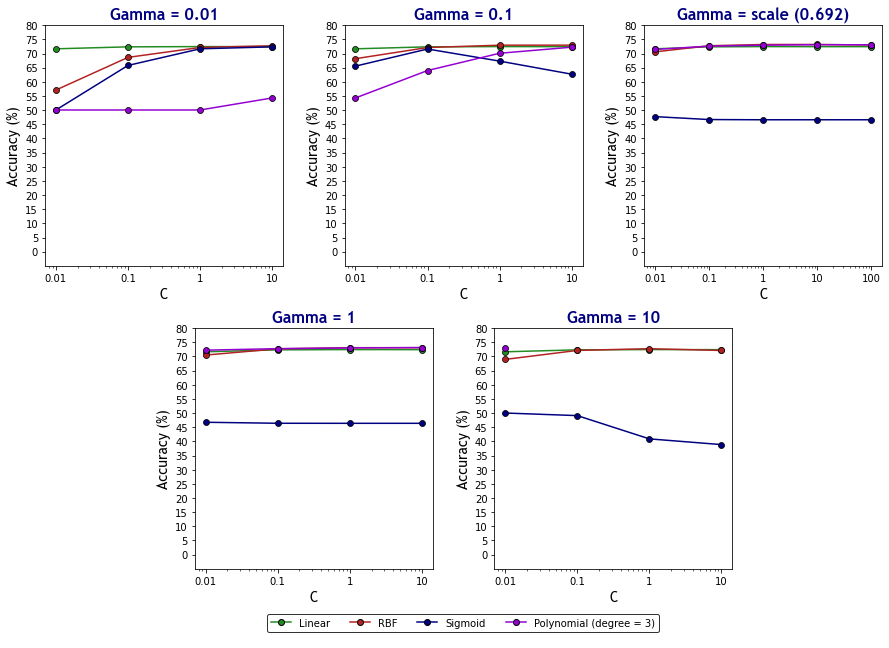

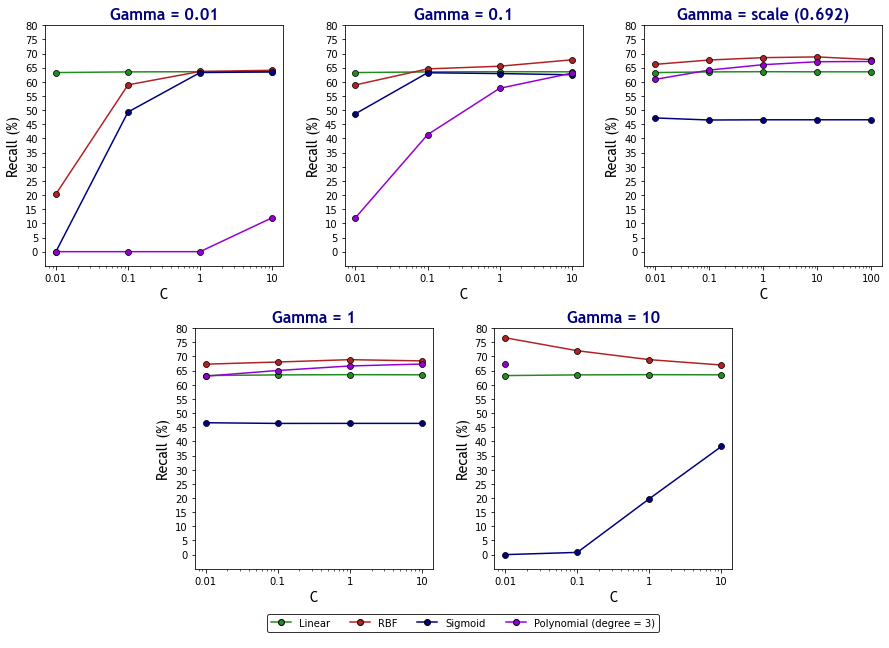

In [10]:
df_params = pd.read_csv('svm_screen_params.csv', sep = ";")
default_scale_gamma = 0.691955007227351
df_params['degree'] = df_params.apply(lambda row: row['degree'] if row['kernel'] == 'poly' else np.nan, axis = 1)
df_params['sum'] = df_params.apply(lambda row: row['accuracy'] + row['recall'] + row['precision'] + row['f1'], axis =1)
df_params['gamma_float'] = df_params.apply(lambda row: default_scale_gamma if row['gamma'] == 'scale' else row['gamma'], axis = 1)
df_params['sample_id'] = df_params.apply(lambda row: f"{row['C']}_{row['gamma']}_{row['kernel']}_{row['degree']}", axis = 1)

df_linear = df_params[df_params['kernel'] == 'linear']
df_rbf = df_params[df_params['kernel'] == 'rbf']
df_sigmoid = df_params[df_params['kernel'] == 'sigmoid']
df_poly = df_params[df_params['kernel'] == 'poly']
df_poly_2 = df_poly[df_poly['degree'] == 2]
df_poly_3 = df_poly[df_poly['degree'] == 3]
df_poly_4 = df_poly[df_poly['degree'] == 4]

# Checking for duplicate experiments:
display(HTML(f"""
<div class = 'all'>
Based on sample_id, <b>{df_params['sample_id'].duplicated().value_counts(normalize = True)[False]:.1%}</b> of rows is unique.

    <table class = 'table_1'>
        <tr>
            <th>Kernel</th>
            <th>Experiments (<i>n</i>)</th>
            <th>Accuracy</th>
            <th>Recall</th>
            <th>Precision</th>
            <th>F1-score</th>            
        </tr>
        <tr>
            <td><b>Linear</b></td>
            <td>{len(df_linear)}</td>
            <td>{np.mean(df_linear['accuracy']):.1%} ± {np.std(df_linear['accuracy']):.1%}</td>
            <td>{np.mean(df_linear['recall']):.1%} ± {np.std(df_linear['recall']):.1%}</td>
            <td>{np.mean(df_linear['precision']):.1%} ± {np.std(df_linear['precision']):.1%}</td>
            <td>{np.mean(df_linear['f1']):.1%} ± {np.std(df_linear['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>RBF</b></td>
            <td>{len(df_rbf)}</td>
            <td>{np.mean(df_rbf['accuracy']):.1%} ± {np.std(df_rbf['accuracy']):.1%}</td>
            <td>{np.mean(df_rbf['recall']):.1%} ± {np.std(df_rbf['recall']):.1%}</td>
            <td>{np.mean(df_rbf['precision']):.1%} ± {np.std(df_rbf['precision']):.1%}</td>
            <td>{np.mean(df_rbf['f1']):.1%} ± {np.std(df_rbf['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>Sigmoid</b></td>
            <td>{len(df_sigmoid)}</td>
            <td>{np.mean(df_sigmoid['accuracy']):.1%} ± {np.std(df_sigmoid['accuracy']):.1%}</td>
            <td>{np.mean(df_sigmoid['recall']):.1%} ± {np.std(df_sigmoid['recall']):.1%}</td>
            <td>{np.mean(df_sigmoid['precision']):.1%} ± {np.std(df_sigmoid['precision']):.1%}</td>
            <td>{np.mean(df_sigmoid['f1']):.1%} ± {np.std(df_sigmoid['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>Polynomial</b><br>(all)</td>
            <td>{len(df_poly)}</td>
            <td>{np.mean(df_poly['accuracy']):.1%} ± {np.std(df_poly['accuracy']):.1%}</td>
            <td>{np.mean(df_poly['recall']):.1%} ± {np.std(df_poly['recall']):.1%}</td>
            <td>{np.mean(df_poly['precision']):.1%} ± {np.std(df_poly['precision']):.1%}</td>
            <td>{np.mean(df_poly['f1']):.1%} ± {np.std(df_poly['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>Polynomial</b><br>(degree = 2)</td>
            <td>{len(df_poly_2)}</td>
            <td>{np.mean(df_poly_2['accuracy']):.1%} ± {np.std(df_poly_2['accuracy']):.1%}</td>
            <td>{np.mean(df_poly_2['recall']):.1%} ± {np.std(df_poly_2['recall']):.1%}</td>
            <td>{np.mean(df_poly_2['precision']):.1%} ± {np.std(df_poly_2['precision']):.1%}</td>
            <td>{np.mean(df_poly_2['f1']):.1%} ± {np.std(df_poly_2['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>Polynomial</b><br>(degree = 3)</td>
            <td>{len(df_poly_3)}</td>
            <td>{np.mean(df_poly_3['accuracy']):.1%} ± {np.std(df_poly_3['accuracy']):.1%}</td>
            <td>{np.mean(df_poly_3['recall']):.1%} ± {np.std(df_poly_3['recall']):.1%}</td>
            <td>{np.mean(df_poly_3['precision']):.1%} ± {np.std(df_poly_3['precision']):.1%}</td>
            <td>{np.mean(df_poly_3['f1']):.1%} ± {np.std(df_poly_3['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>Polynomial</b><br>(degree = 4)</td>
            <td>{len(df_poly_4)}</td>
            <td>{np.mean(df_poly_4['accuracy']):.1%} ± {np.std(df_poly_4['accuracy']):.1%}</td>
            <td>{np.mean(df_poly_4['recall']):.1%} ± {np.std(df_poly_4['recall']):.1%}</td>
            <td>{np.mean(df_poly_4['precision']):.1%} ± {np.std(df_poly_4['precision']):.1%}</td>
            <td>{np.mean(df_poly_4['f1']):.1%} ± {np.std(df_poly_4['f1']):.1%}</td>
        </tr>
        <tr>
            <td><b>All</b></td>
            <td>{len(df_params)}</td>
            <td>{np.mean(df_params['accuracy']):.1%} ± {np.std(df_params['accuracy']):.1%}</td>
            <td>{np.mean(df_params['recall']):.1%} ± {np.std(df_params['recall']):.1%}</td>
            <td>{np.mean(df_params['precision']):.1%} ± {np.std(df_params['precision']):.1%}</td>
            <td>{np.mean(df_params['f1']):.1%} ± {np.std(df_params['f1']):.1%}</td>
        </tr>
    </table>
</div>"""))

display(HTML(f"""
<div class = 'all'>
    <table class = 'table_1'>
        <tr>
            <th>Kernel</th>
            <th>Max Accuracy</th>
            <th>Min Accuracy</th>
            <th>Max Recall</th>
            <th>Min Recall</th>          
        </tr>
        <tr>
            <td><b>Linear</b></td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_linear['accuracy']):.1%}</b>
                <br>- <code>C = {df_linear.loc[df_linear['accuracy'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_linear.loc[df_linear['accuracy'].idxmax(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_linear['accuracy']):.1%}</b>
                <br>- <code>C = {df_linear.loc[df_linear['accuracy'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_linear.loc[df_linear['accuracy'].idxmin(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_linear['recall']):.1%}</b>
                <br>- <code>C = {df_linear.loc[df_linear['recall'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_linear.loc[df_linear['recall'].idxmax(), 'gamma']}</code>
            </td>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_linear['recall']):.1%}</b>
                <br>- <code>C = {df_linear.loc[df_linear['recall'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_linear.loc[df_linear['recall'].idxmin(), 'gamma']}</code>
            </td>
        </tr>
        <tr>
            <td><b>RBF</b></td>
            <td style = 'text-align: left !important; background-color: palegreen; border: 2px solid forestgreen'>- Value: <b>{np.max(df_rbf['accuracy']):.1%}</b>
                <br>- <code>C = {df_rbf.loc[df_rbf['accuracy'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_rbf.loc[df_rbf['accuracy'].idxmax(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_rbf['accuracy']):.1%}</b>
                <br>- <code>C = {df_rbf.loc[df_rbf['accuracy'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_rbf.loc[df_rbf['accuracy'].idxmin(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important; background-color: palegreen; border: 2px solid forestgreen'>- Value: <b>{np.max(df_rbf['recall']):.1%}</b>
                <br>- <code>C = {df_rbf.loc[df_rbf['recall'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_rbf.loc[df_rbf['recall'].idxmax(), 'gamma']}</code>
            </td>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_rbf['recall']):.1%}</b>
                <br>- <code>C = {df_rbf.loc[df_rbf['recall'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_rbf.loc[df_rbf['recall'].idxmin(), 'gamma']}</code>
            </td>
        </tr>
        <tr>
            <td><b>Sigmoid</b></td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_sigmoid['accuracy']):.1%}</b>
                <br>- <code>C = {df_sigmoid.loc[df_sigmoid['accuracy'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_sigmoid.loc[df_sigmoid['accuracy'].idxmax(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important; background-color: lightsalmon; border: 2px solid firebrick'>- Value: <b>{np.min(df_sigmoid['accuracy']):.1%}</b>
                <br>- <code>C = {df_sigmoid.loc[df_sigmoid['accuracy'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_sigmoid.loc[df_sigmoid['accuracy'].idxmin(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_sigmoid['recall']):.1%}</b>
                <br>- <code>C = {df_sigmoid.loc[df_sigmoid['recall'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_sigmoid.loc[df_sigmoid['recall'].idxmax(), 'gamma']}</code>
            </td>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_sigmoid['recall']):.1%}</b>
                <br>- <code>C = {df_sigmoid.loc[df_sigmoid['recall'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_sigmoid.loc[df_sigmoid['recall'].idxmin(), 'gamma']}</code>
            </td>
        </tr>
        <tr>
            <td><b>Polynomial</b><br>(degree = 3)</td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_poly_3['accuracy']):.1%}</b>
                <br>- <code>C = {df_poly_3.loc[df_poly_3['accuracy'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_poly_3.loc[df_poly_3['accuracy'].idxmax(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_poly_3['accuracy']):.1%}</b>
                <br>- <code>C = {df_poly_3.loc[df_poly_3['accuracy'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_poly_3.loc[df_poly_3['accuracy'].idxmin(), 'gamma']}</code>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_poly_3['recall']):.1%}</b>
                <br>- <code>C = {df_poly_3.loc[df_poly_3['recall'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_poly_3.loc[df_poly_3['recall'].idxmax(), 'gamma']}</code>
            </td>
            </td>
            <td style = 'text-align: left !important; background-color: lightsalmon; border: 2px solid firebrick'>- Value: <b>{np.min(df_poly_3['recall']):.1%}</b>
                <br>- <code>C = {df_poly_3.loc[df_poly_3['recall'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_poly_3.loc[df_poly_3['recall'].idxmin(), 'gamma']}</code>
            </td>
        </tr>
        <tr>
            <td><b>All</b></td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_params['accuracy']):.1%}</b>
                <br>- <code>C = {df_params.loc[df_params['accuracy'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_params.loc[df_params['accuracy'].idxmax(), 'gamma']}</code>
                <br>- <code>kernel = {df_params.loc[df_params['accuracy'].idxmax(), 'kernel']}</code>               
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_params['accuracy']):.1%}</b>
                <br>- <code>C = {df_params.loc[df_params['accuracy'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_params.loc[df_params['accuracy'].idxmin(), 'gamma']}</code>
                <br>- <code>kernel = {df_params.loc[df_params['accuracy'].idxmin(), 'kernel']}</code>                
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.max(df_params['recall']):.1%}</b>
                <br>- <code>C = {df_params.loc[df_params['recall'].idxmax(), 'C']}</code>
                <br>- <code>gamma = {df_params.loc[df_params['recall'].idxmax(), 'gamma']}</code>
                <br>- <code>kernel = {df_params.loc[df_params['recall'].idxmax(), 'kernel']}</code>
            </td>
            </td>
            <td style = 'text-align: left !important'>- Value: <b>{np.min(df_params['recall']):.1%}</b>
                <br>- <code>C = {df_params.loc[df_params['recall'].idxmin(), 'C']}</code>
                <br>- <code>gamma = {df_params.loc[df_params['recall'].idxmin(), 'gamma']}</code>
                <br>- <code>kernel = {df_params.loc[df_params['recall'].idxmin(), 'kernel']}</code>
            </td>
        </tr>
    </table>
    <p>
        <b>Linear</b> kernel displayed very limited variability for all metrics, reflecting the absence of impact of
        <code>gamma</code> and the limited impact of <code>C</code>. Consequently, min and max values for both accuracy and recall were comparable. For both metrics, 
        <code>C = 1</code> and <code>gamma = "scale"</code> produced the best results.
    </p>
    <p>
        <b>RBF</b> kernel led to the best values for both accuracy (<b>{np.max(df_rbf['accuracy']):.1%}</b>) and recall
        (<b>{np.max(df_rbf['recall']):.1%}</b>). Interestingly, max value for accuracy was obtained with 
        <code>C = 10.0</code> and <code>gamma = "scale"</code> whereas best recall was obtained with
        <code>C = 0.01</code> and <code>gamma = 10</code>, suggesting that finding balance between both <code>C</code>
        and <code>gamma</code> is essential. Moderate variability was found with this kernel, and the lowest values for both
        accuracy and recall were found with <code>C = 0.01</code> and <code>gamma = 0.01</code>.
    </p>
    <p>
        <b>Sigmoid</b> kernel displayed substantial variability and low performances, with an average accuracy of
        {np.mean(df_sigmoid['accuracy']):.1%}. This was expected as sigmoid kernel may need a more refined hyperparameter
        tuning.
    </p>
    <p>
        <b>Polynomial</b> kernel (third degree) produced high variability, yet its max value for accuracy (<b>{np.max(df_poly_3['accuracy']):.1%}</b>)
        was comparable to the max accuracy obtained with RBF. Max accuracy and max recall were both obtained with 
        <code>C = 0.01</code> and <code>gamma = 10</code>.
    </p>
    <p>
        Overall, small values of <code>C</code> produced good results when associated to a higher <code>gamma</code> and 
        vice versa. Conversely, comparable values for <code>C</code> and <code>gamma</code> led to poor performances. 
        <code>C</code> did not impact accuracy when <code>gamma = "scale"</code>  
        (<i>ie</i> {default_scale_gamma:.3f}) or when <code>gamma = 1</code>. Moreover, Linear, RBF and Polynomial kernel
        (degree = 3) had very similar accuracies with these values for <code>gamma</code>.
    </p>
    <h3>Impact of SVM Parameters on Accuracy</h3>
</div>"""))


fig = plt.figure(figsize = (15,10))
spec = gridspec.GridSpec(nrows = 4, ncols = 6)
plt.subplots_adjust(wspace = 0.7, hspace = 0.7)

ax = fig.add_subplot(spec[0:2,0:2])
sns.lineplot(x = "C", y = "accuracy", data = df_linear[df_linear['gamma'] == "0.01"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_rbf[df_rbf['gamma'] == "0.01"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_sigmoid[df_sigmoid['gamma'] == "0.01"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_poly_3[df_poly_3['gamma'] == "0.01"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Accuracy (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 0.01", fontdict = fontdict_title)

ax = fig.add_subplot(spec[0:2,2:4])
sns.lineplot(x = "C", y = "accuracy", data = df_linear[df_linear['gamma'] == "0.1"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_rbf[df_rbf['gamma'] == "0.1"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_sigmoid[df_sigmoid['gamma'] == "0.1"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_poly_3[df_poly_3['gamma'] == "0.1"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Accuracy (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 0.1", fontdict = fontdict_title)

ax = fig.add_subplot(spec[0:2,4:])
sns.lineplot(x = "C", y = "accuracy", data = df_linear[df_linear['gamma'] == "scale"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_rbf[df_rbf['gamma'] == "scale"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_sigmoid[df_sigmoid['gamma'] == "scale"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_poly_3[df_poly_3['gamma'] == "scale"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Accuracy (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10, 100], labels = [0.01, 0.1, 1, 10, 100])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title(f"Gamma = scale ({default_scale_gamma:.3f})", fontdict = fontdict_title)

ax = fig.add_subplot(spec[2:,1:3])
sns.lineplot(x = "C", y = "accuracy", data = df_linear[df_linear['gamma'] == "1"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_rbf[df_rbf['gamma'] == "1"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_sigmoid[df_sigmoid['gamma'] == "1"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_poly_3[df_poly_3['gamma'] == "1"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Accuracy (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 1", fontdict = fontdict_title)

ax = fig.add_subplot(spec[2:,3:5])
sns.lineplot(x = "C", y = "accuracy", data = df_linear[df_linear['gamma'] == "10"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_rbf[df_rbf['gamma'] == "10"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_sigmoid[df_sigmoid['gamma'] == "10"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "accuracy", data = df_poly_3[df_poly_3['gamma'] == "10"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Accuracy (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 10", fontdict = fontdict_title)

handles = [
    Line2D([0], [0], label = "Linear", color = "forestgreen", marker = "o", markerfacecolor = "forestgreen", markeredgecolor = "black"),
    Line2D([0], [0], label = "RBF", color = "firebrick", marker = "o", markerfacecolor = "firebrick", markeredgecolor = "black"),
    Line2D([0], [0], label = "Sigmoid", color = "navy", marker = "o", markerfacecolor = "navy", markeredgecolor = "black"),
    Line2D([0], [0], label = "Polynomial (degree = 3)", color = "darkviolet", marker = "o", markerfacecolor = "darkviolet", markeredgecolor = "black")
]

fig.legend(handles = handles, edgecolor = "black", facecolor = "white", loc = [0.3, 0.025], ncols = 4)

plt.show()

display(HTML(f"""
<div class ='all'>
    <h3>Impact of SVM Parameters on Recall</h3>
</div>
"""))

fig = plt.figure(figsize = (15,10))
spec = gridspec.GridSpec(nrows = 4, ncols = 6)
plt.subplots_adjust(wspace = 0.7, hspace = 0.7)

ax = fig.add_subplot(spec[0:2,0:2])
sns.lineplot(x = "C", y = "recall", data = df_linear[df_linear['gamma'] == "0.01"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_rbf[df_rbf['gamma'] == "0.01"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_sigmoid[df_sigmoid['gamma'] == "0.01"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_poly_3[df_poly_3['gamma'] == "0.01"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Recall (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 0.01", fontdict = fontdict_title)

ax = fig.add_subplot(spec[0:2,2:4])
sns.lineplot(x = "C", y = "recall", data = df_linear[df_linear['gamma'] == "0.1"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_rbf[df_rbf['gamma'] == "0.1"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_sigmoid[df_sigmoid['gamma'] == "0.1"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_poly_3[df_poly_3['gamma'] == "0.1"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Recall (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 0.1", fontdict = fontdict_title)

ax = fig.add_subplot(spec[0:2,4:])
sns.lineplot(x = "C", y = "recall", data = df_linear[df_linear['gamma'] == "scale"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_rbf[df_rbf['gamma'] == "scale"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_sigmoid[df_sigmoid['gamma'] == "scale"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_poly_3[df_poly_3['gamma'] == "scale"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Recall (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10, 100], labels = [0.01, 0.1, 1, 10, 100])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title(f"Gamma = scale ({default_scale_gamma:.3f})", fontdict = fontdict_title)

ax = fig.add_subplot(spec[2:,1:3])
sns.lineplot(x = "C", y = "recall", data = df_linear[df_linear['gamma'] == "1"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_rbf[df_rbf['gamma'] == "1"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_sigmoid[df_sigmoid['gamma'] == "1"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_poly_3[df_poly_3['gamma'] == "1"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Recall (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 1", fontdict = fontdict_title)

ax = fig.add_subplot(spec[2:,3:5])
sns.lineplot(x = "C", y = "recall", data = df_linear[df_linear['gamma'] == "10"], color = "forestgreen", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_rbf[df_rbf['gamma'] == "10"], color = "firebrick", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_sigmoid[df_sigmoid['gamma'] == "10"], color = "navy", marker = "o", markersize = 6, markeredgecolor = "black")
sns.lineplot(x = "C", y = "recall", data = df_poly_3[df_poly_3['gamma'] == "10"], color = "darkviolet", marker = "o", markersize = 6, markeredgecolor = "black")

ax.set_ylim(-0.05,0.8)
ax.set_yticks(ticks = [x/100 for x in range(0,85,5)], labels = range(0,85,5))
ax.set_ylabel("Recall (%)", fontdict = fontdict_labels)

ax.set_xscale('log')
ax.set_xticks(ticks = [0.01, 0.1, 1, 10], labels = [0.01, 0.1, 1, 10])
ax.set_xlabel("C", fontdict = fontdict_labels)

ax.set_title("Gamma = 10", fontdict = fontdict_title)

handles = [
    Line2D([0], [0], label = "Linear", color = "forestgreen", marker = "o", markerfacecolor = "forestgreen", markeredgecolor = "black"),
    Line2D([0], [0], label = "RBF", color = "firebrick", marker = "o", markerfacecolor = "firebrick", markeredgecolor = "black"),
    Line2D([0], [0], label = "Sigmoid", color = "navy", marker = "o", markerfacecolor = "navy", markeredgecolor = "black"),
    Line2D([0], [0], label = "Polynomial (degree = 3)", color = "darkviolet", marker = "o", markerfacecolor = "darkviolet", markeredgecolor = "black")
]

fig.legend(handles = handles, edgecolor = "black", facecolor = "white", loc = [0.3, 0.025], ncols = 4)

plt.show()

display(HTML(f"""
<div class = 'all conclusion'>
    <h3>Conclusion</h3>
    <p>
        For this project, SVM models will be trained on a <b>RBF</b> kernel, with <code>C = 0.1</code> and <code>gamma = 10</code>, as this combination led to good and
        balanced performances:
        <ul>
            <li>Accuracy: {df_rbf.at[63, 'accuracy']:.1%}</li>
            <li>Recall: {df_rbf.at[63, 'recall']:.1%}</li>
            <li>Precision: {df_rbf.at[63, 'precision']:.1%}</li>
            <li>F1-score: {df_rbf.at[63, 'f1']:.1%}</li>
        </ul>
        It's also the best combination for a high recall without a significant loss in accuracy.
    </p>
</div>
"""))

In [11]:
# Initiating a dict to store information on tests
tracking = {}

<h4>Code for: Default model</h4>

In [12]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I

def preprocess_0(df = df):   

    # Dropping created features from Part I
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)

    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']

    return X, y

X, y = preprocess_0(df)

In [13]:
y_pred, y_test, svm_perf = svm_model(X,y)
perf_table = pd.DataFrame({
    'test_name' : ['test_0'],
    'test_setup' : ["""Default Model"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["0"])

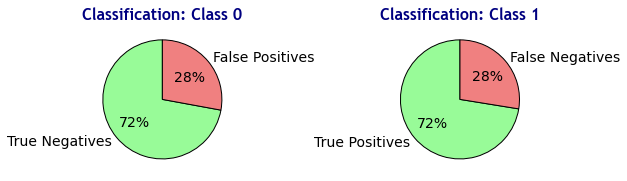

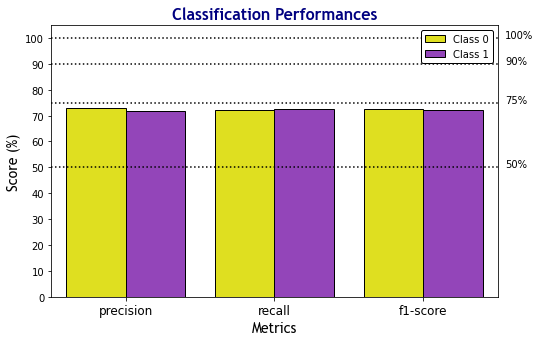

In [14]:
display(HTML(f"""
<div class = 'all'>
    <h2>Default Model</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Preprocess 1 - df with all created features from Part I</h4>

In [15]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I

def preprocess_1(df = df):   

    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])
    df['ap_aha'] = label_encoder.fit_transform(df["ap_aha"])

    # Encoding unordered categorical features
    df = pd.get_dummies(df, columns = ['age_group', 'lifestyle'])
    df = df.rename(columns = {
     'age_group_< 45' : 'age_group_1',
     'age_group_[46 - 50]': 'age_group_2',
     'age_group_[51 - 55]': 'age_group_3',
     'age_group_[56 - 60]': 'age_group_4',
     'age_group_[61 - 65]': 'age_group_5',
    })

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex', 'healthy_ls']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex', 'healthy_ls']].astype('int64')
    
    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']
    
    return X, y

X, y = preprocess_1(df)

In [16]:
y_pred, y_test, svm_perf = svm_model(X,y)
temp_df = pd.DataFrame({
    'test_name' : ['test_1'],
    'test_setup' : ["""df with all created features from Part I."""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["1"])
perf_table = pd.concat([perf_table, temp_df])

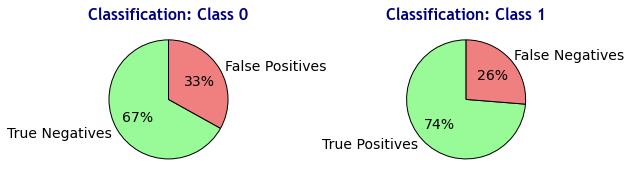

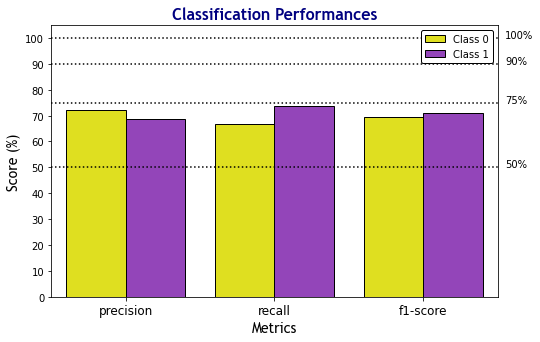

In [17]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 1</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Preprocess 2 - Keeping a limited number of created features</h4>

In [18]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I

def preprocess_2(df):  
    
    # Dropping some created features
    df = df.drop(["age", "healthy_ls", "lifestyle", "ap_aha"], axis = 1)

    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Encoding unordered categorical features
    df = pd.get_dummies(df, columns = ['age_group'])
    df = df.rename(columns = {
     'age_group_< 45' : 'age_group_1',
     'age_group_[46 - 50]': 'age_group_2',
     'age_group_[51 - 55]': 'age_group_3',
     'age_group_[56 - 60]': 'age_group_4',
     'age_group_[61 - 65]': 'age_group_5',
    })

    # Setting datatypes
    df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']] = df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'female_sex']].astype('int64')
    
    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']
  
    return X, y

X, y = preprocess_2(df)

In [19]:
y_pred, y_test, svm_perf = svm_model(X,y)
temp_df = pd.DataFrame({
    'test_name' : ['test_2'],
    'test_setup' : ["""df with some features from Part I. Age is drop, age_group is kept"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["2"])
perf_table = pd.concat([perf_table, temp_df])

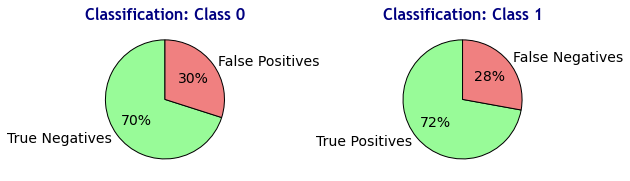

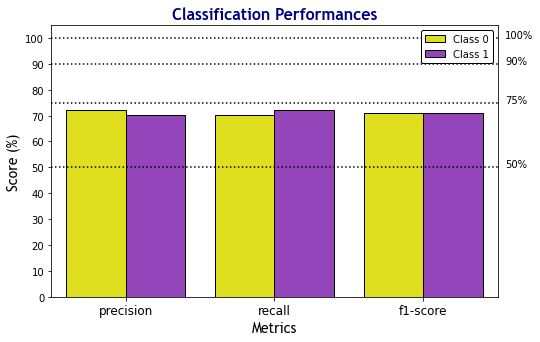

In [20]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 2</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Preprocess 3</h4>

In [21]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I

def preprocess_3(df):  
    
    # Dropping some created features
    df = df.drop(["ap_lo", "gluc", "alco", "smoke", "healthy_ls", "lifestyle", "ap_aha", "age_group"], axis = 1)

    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    #df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['cholesterol', 'active', 'cardio', 'female_sex']] = df[['cholesterol', 'active', 'cardio', 'female_sex']].astype('int64')
    
    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']
  
    return X, y

X, y = preprocess_3(df)

In [23]:
y_pred, y_test, svm_perf = svm_model(X,y)

temp_df = pd.DataFrame({
    'test_name' : ['test_3'],
    'test_setup' : ["""df with some features from Part I."""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["3"])
perf_table = pd.concat([perf_table, temp_df])

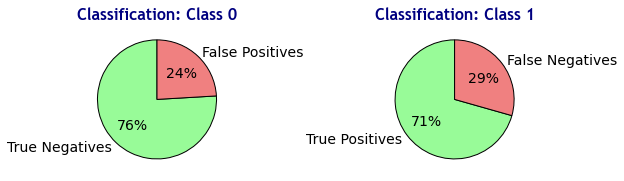

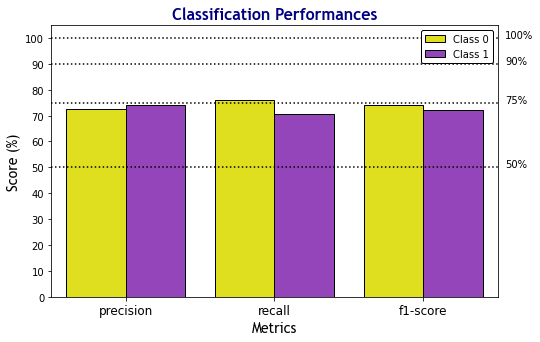

In [24]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 3</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Test 4</h4>

In [25]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I
df = df[df['sex'] == "female"]

def preprocess_4(df):  
    
    # Dropping created features from Part I
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi', "sex"], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']

    return X, y

X, y = preprocess_4(df)

In [26]:
y_pred, y_test, svm_perf = svm_model(X,y)

temp_df = pd.DataFrame({
    'test_name' : ['test_4'],
    'test_setup' : ["""Default features, females only"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["4"])
perf_table = pd.concat([perf_table, temp_df])

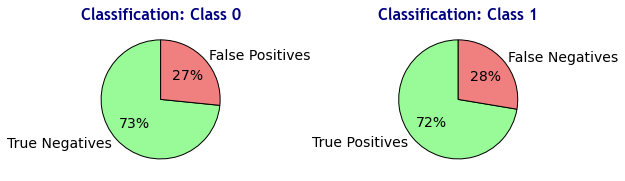

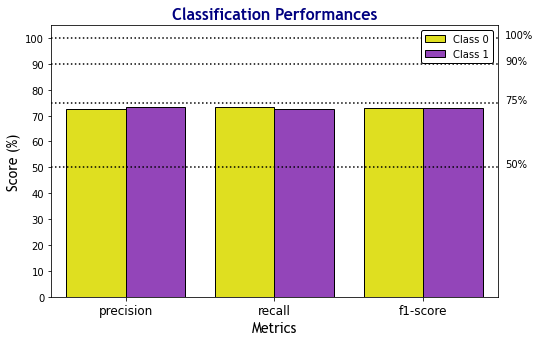

In [27]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 4</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Test 5</h4>

In [28]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I
df = df[df['sex'] == "male"]

def preprocess_5(df):  
    
    # Dropping created features from Part I
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi', "sex"], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']

    return X, y

X, y = preprocess_5(df)

In [29]:
y_pred, y_test, svm_perf = svm_model(X,y)

temp_df = pd.DataFrame({
    'test_name' : ['test_5'],
    'test_setup' : ["""Default features, males only"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["5"])
perf_table = pd.concat([perf_table, temp_df])

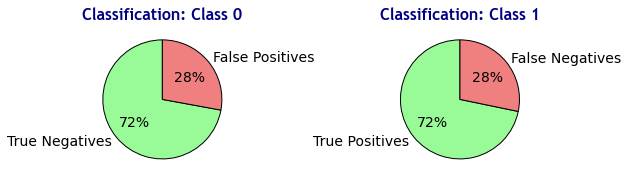

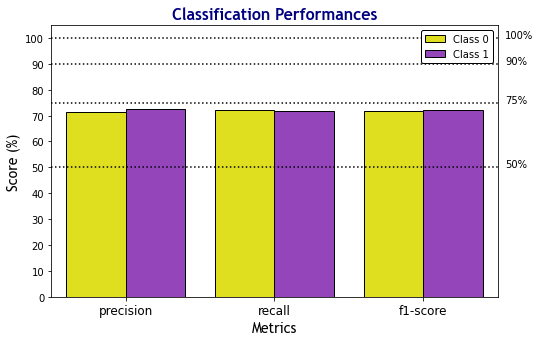

In [30]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 5</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Test 6</h4>

In [31]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I
df = df[df['age_group'] == "< 45"]

def preprocess_6(df):  
    
    # Dropping created features from Part I
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)
    
    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']

    return X, y

X, y = preprocess_6(df)

In [32]:
y_pred, y_test, svm_perf = svm_model(X,y)

temp_df = pd.DataFrame({
    'test_name' : ['test_6'],
    'test_setup' : ["""Age group: < 45 yo"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["6"])
perf_table = pd.concat([perf_table, temp_df])

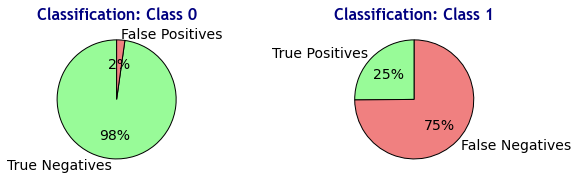

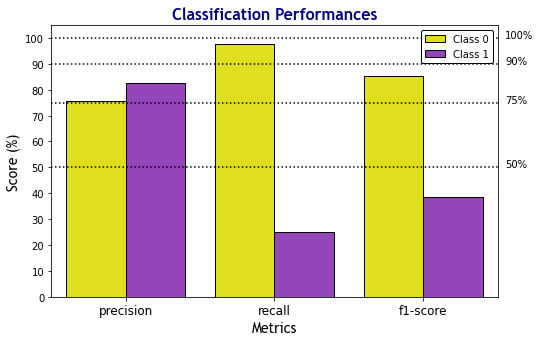

In [33]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 6</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Test 7</h4>

In [34]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I
df = df[df['age_group'] == "[46 - 50]"]

def preprocess_7(df):  
    
    # Dropping created features from Part I
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)
    
    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']

    return X, y

X, y = preprocess_7(df)

In [35]:
y_pred, y_test, svm_perf = svm_model(X,y)

temp_df = pd.DataFrame({
    'test_name' : ['test_7'],
    'test_setup' : ["""Age group: [46 - 50] yo"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["7"])
perf_table = pd.concat([perf_table, temp_df])

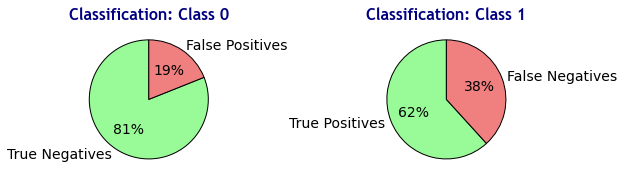

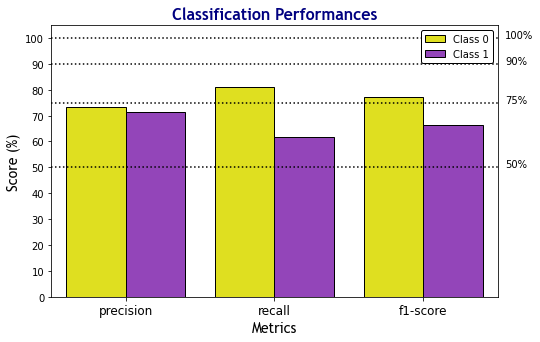

In [36]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 7</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Test 8</h4>

In [37]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I
df = df[df['age_group'] == "[51 - 55]"]

def preprocess_8(df):  
    
    # Dropping created features from Part I
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)
    
    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']

    return X, y

X, y = preprocess_8(df)

In [38]:
y_pred, y_test, svm_perf = svm_model(X,y)

temp_df = pd.DataFrame({
    'test_name' : ['test_8'],
    'test_setup' : ["""Age group: [51 - 55] yo"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["8"])
perf_table = pd.concat([perf_table, temp_df])

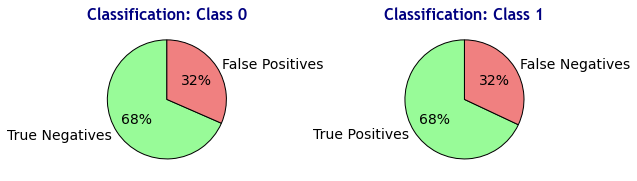

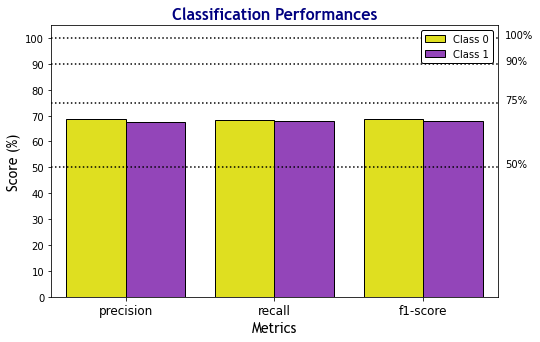

In [39]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 8</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Test 9</h4>

In [40]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I
df = df[df['age_group'] == "[56 - 60]"]

def preprocess_9(df):  
    
    # Dropping created features from Part I
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)
    
    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']

    return X, y

X, y = preprocess_9(df)

In [41]:
y_pred, y_test, svm_perf = svm_model(X,y)

temp_df = pd.DataFrame({
    'test_name' : ['test_9'],
    'test_setup' : ["""Age group: [56 - 60] yo"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["9"])
perf_table = pd.concat([perf_table, temp_df])

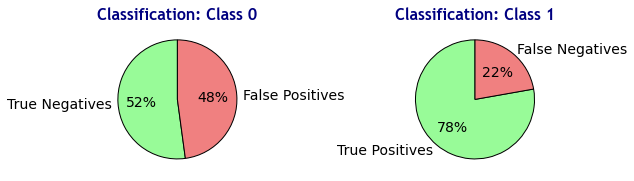

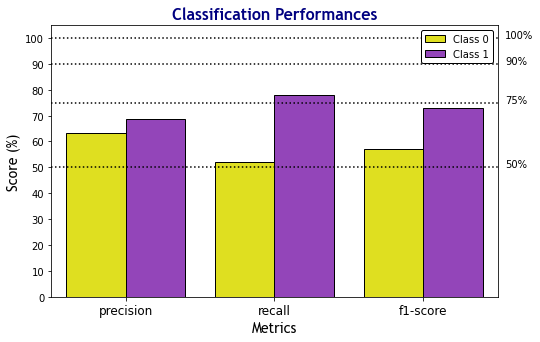

In [42]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 9</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Test 10</h4>

In [43]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I
df = df[df['age_group'] == "[61 - 65]"]

def preprocess_10(df):  
    
    # Dropping created features from Part I
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)
    
    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']

    return X, y

X, y = preprocess_10(df)

In [44]:
y_pred, y_test, svm_perf = svm_model(X,y)

temp_df = pd.DataFrame({
    'test_name' : ['test_10'],
    'test_setup' : ["""Age group: [61 - 65] yo"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["10"])
perf_table = pd.concat([perf_table, temp_df])

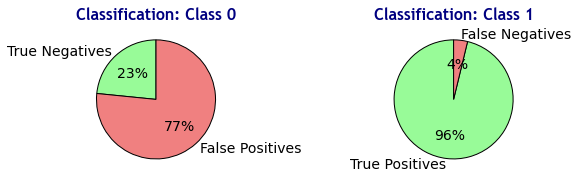

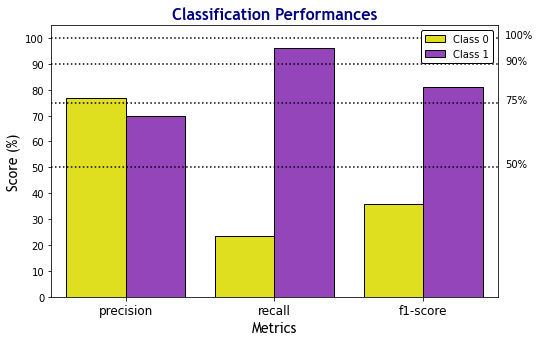

In [45]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 10</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Test 11</h4>

In [46]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I
df = df[df['age'] < 53]

def preprocess_11(df):  
    
    # Dropping created features from Part I
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)
    
    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']

    return X, y

X, y = preprocess_11(df)

In [47]:
y_pred, y_test, svm_perf = svm_model(X,y)

temp_df = pd.DataFrame({
    'test_name' : ['test_11'],
    'test_setup' : ["""Age < 53 yo"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["11"])

perf_table = pd.concat([perf_table, temp_df])

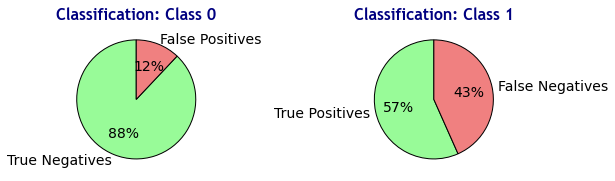

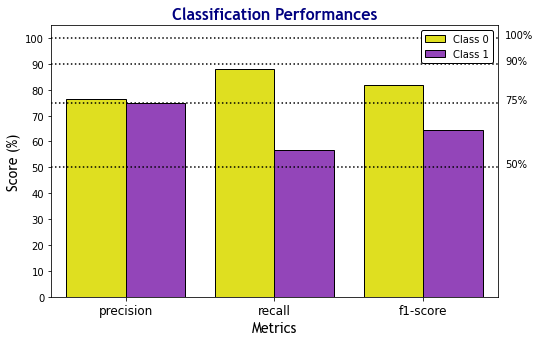

In [48]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 11</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Test 12</h4>

In [49]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I
df = df[df['age'] >= 53]

def preprocess_12(df):  
    
    # Dropping created features from Part I
    df = df.drop(['age_group', 'lifestyle', 'ap_m', 'ap_aha', 'healthy_ls', 'bmi'], axis = 1)
    
    # Turning Sex into a binary feature
    df['female_sex'] = df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis = 1)
    df = df.drop(['sex'], axis = 1)

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])
    df["gluc"] = label_encoder.fit_transform(df["gluc"])

    # Setting datatypes
    df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = df[['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']

    return X, y

X, y = preprocess_12(df)

In [50]:
y_pred, y_test, svm_perf = svm_model(X,y)

temp_df = pd.DataFrame({
    'test_name' : ['test_12'],
    'test_setup' : ["""Age >= 53 yo"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["12"])

perf_table = pd.concat([perf_table, temp_df])

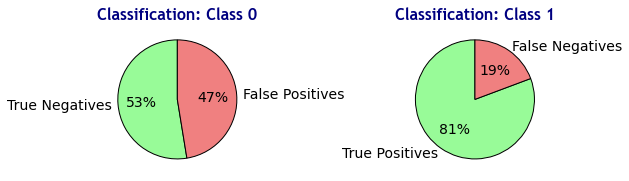

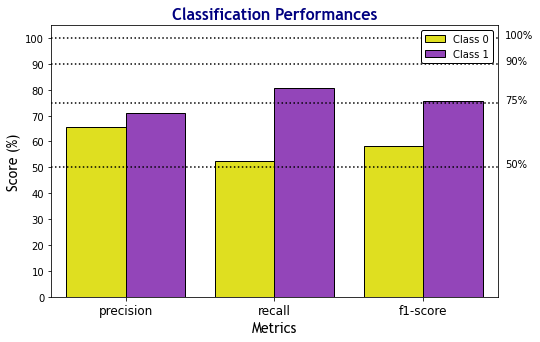

In [51]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 12</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

<h4>Code for: Test 13</h4>

In [52]:
df = pd.read_csv('clean_cvd.csv', sep = ",")            # The very same df that was used on Part I

def preprocess_13(df):  
    
    # Dropping created features from Part I
    df = df.drop(['sex', 'height', 'ap_hi', 'ap_lo',
                  'gluc', 'smoke', 'alco', 'active', 'age_group', 'bmi', 'ap_m',
       'ap_aha', 'lifestyle', 'healthy_ls'], axis = 1)
    

    # Encoding ordered categorical features
    label_encoder = LabelEncoder()              
    df["cholesterol"] = label_encoder.fit_transform(df["cholesterol"])

    # Setting datatypes
    df[['age', 'cholesterol', 'cardio']] = df[['age', 'cholesterol', 'cardio']].astype('int64')

    # Min-Max Scaling
    scaler = MinMaxScaler()
    columns_df = df.columns          # Saving columns names before scaling
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns = columns_df)

    # Train and Test datasets
    X = df.drop("cardio", axis = 1)
    y = df['cardio']

    return X, y

X, y = preprocess_13(df)

In [53]:
y_pred, y_test, svm_perf = svm_model(X,y)

temp_df = pd.DataFrame({
    'test_name' : ['test_13'],
    'test_setup' : ["""Most important features only"""],
    'features' : [X.columns.tolist()],
    'accuracy' : [svm_perf['accuracy']],
    'precision_0' : [svm_perf['0.0']['precision']],
    'recall_0' : [svm_perf['0.0']['recall']],
    'f1_0' : [svm_perf['0.0']['f1-score']],
    'precision_1' : [svm_perf['1.0']['precision']],
    'recall_1' : [svm_perf['1.0']['recall']],
    'f1_1' : [svm_perf['1.0']['f1-score']]
}, index = ["13"])

perf_table = pd.concat([perf_table, temp_df])

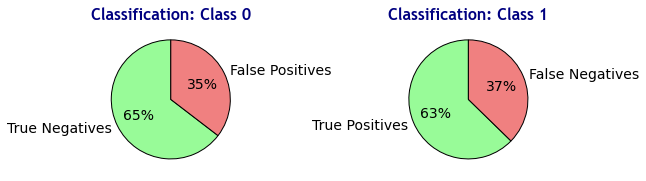

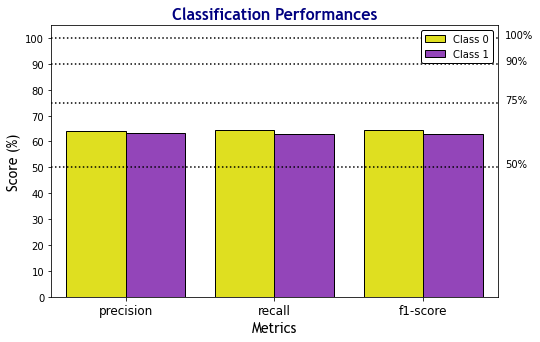

In [54]:
display(HTML(f"""
<div class = 'all'>
    <h2>Test 13</h2>
    
    <h3>Classification Results</h3>
    {matrix_display(y_test, y_pred)}
</div>
"""))

classification_plot(y_test, y_pred)        
display(HTML(f"""
<div class = 'all'>
    <h3>Metrics</h3>
</div>
"""))

perf_barplot(svm_perf)
report_table(svm_perf)

In [55]:
perf_table

,test_name,test_setup,features,accuracy,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1
0,test_0,Default Model,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.722826,0.728083,0.721154,0.724602,0.717551,0.724536,0.721027
1,test_1,df with all created features from Part I.,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.702882,0.722640,0.669250,0.694921,0.685482,0.737280,0.710439
2,test_2,df with some features from Part I. Age is drop...,"[height, weight, ap_hi, ap_lo, cholesterol, gl...",0.711019,0.720177,0.700746,0.710329,0.702148,0.721525,0.711705
3,test_3,df with some features from Part I. Age is drop...,"[age, height, weight, ap_hi, cholesterol, acti...",0.732996,0.725441,0.759321,0.741994,0.741490,0.706071,0.723347
4,test_4,"Default features, females only","[age, height, weight, ap_hi, ap_lo, cholestero...",0.728877,0.725711,0.734082,0.729872,0.732104,0.723694,0.727875
5,test_5,"Default features, males only","[age, height, weight, ap_hi, ap_lo, cholestero...",0.719338,0.712275,0.721209,0.716714,0.726357,0.717523,0.721913
6,test_6,Age group: < 45 yo,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.764305,0.758324,0.977810,0.854193,0.825095,0.251448,0.385435
7,test_7,Age group: [46 - 50] yo,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.726806,0.734582,0.810484,0.770669,0.713851,0.617512,0.662196
8,test_8,Age group: [51 - 55] yo,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.682273,0.687734,0.684406,0.686066,0.676706,0.680077,0.678387
9,test_9,Age group: [56 - 60] yo,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.669020,0.633738,0.521388,0.572099,0.687945,0.777856,0.730143


In [83]:
perf_table

,test_name,test_setup,features,accuracy,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1
0,test_0,Default Model,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.722826,0.728083,0.721154,0.724602,0.717551,0.724536,0.721027
1,test_1,df with all created features from Part I.,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.702882,0.722640,0.669250,0.694921,0.685482,0.737280,0.710439
2,test_2,df with some features from Part I. Age is drop...,"[height, weight, ap_hi, ap_lo, cholesterol, gl...",0.711019,0.720177,0.700746,0.710329,0.702148,0.721525,0.711705
3,test_3,df with some features from Part I. Age is drop...,"[age, height, weight, ap_hi, cholesterol, acti...",0.732996,0.725441,0.759321,0.741994,0.741490,0.706071,0.723347
4,test_4,"Default features, females only","[age, height, weight, ap_hi, ap_lo, cholestero...",0.728877,0.725711,0.734082,0.729872,0.732104,0.723694,0.727875
5,test_5,"Default features, males only","[age, height, weight, ap_hi, ap_lo, cholestero...",0.719338,0.712275,0.721209,0.716714,0.726357,0.717523,0.721913
6,test_6,Age group: < 45 yo,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.764305,0.758324,0.977810,0.854193,0.825095,0.251448,0.385435
7,test_7,Age group: [46 - 50] yo,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.726806,0.734582,0.810484,0.770669,0.713851,0.617512,0.662196
8,test_8,Age group: [51 - 55] yo,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.682273,0.687734,0.684406,0.686066,0.676706,0.680077,0.678387
9,test_9,Age group: [56 - 60] yo,"[age, height, weight, ap_hi, ap_lo, cholestero...",0.669020,0.633738,0.521388,0.572099,0.687945,0.777856,0.730143


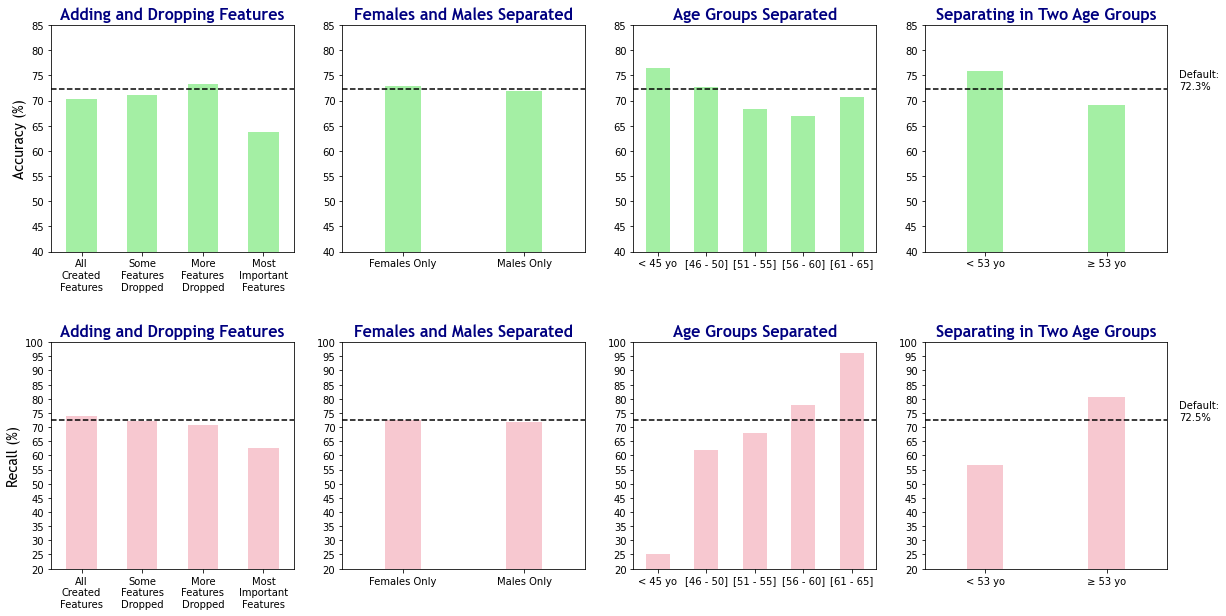

In [107]:
fig = plt.figure(figsize = (20,10))
spec = gridspec.GridSpec(nrows = 2, ncols = 4)
fig.subplots_adjust(hspace = 0.4)

########### ACCURACY ##############

# Selected Features - Accuracy
ax = fig.add_subplot(spec[0,0])
sns.barplot(x = 'test_name', y = 'accuracy', data = perf_table.iloc[[1,2,3,13]], color = "palegreen", width = 0.5)
y_ref = perf_table.loc["0", 'accuracy']
ax.axhline(y = y_ref, color = 'black', linestyle = 'dashed')

ax.set_ylim(0.4,0.85)
ax.set_yticks(ticks = [x/100 for x in range(40,90,5)], labels = range(40,90,5))
ax.set_ylabel("Accuracy (%)", fontdict = fontdict_labels)

ax.set_xticks(ticks = ax.get_xticks(), labels = ['All\nCreated\nFeatures', 'Some\nFeatures\nDropped', 'More\nFeatures\nDropped', 'Most\nImportant\nFeatures'])
ax.set_xlabel(None)

ax.set_title('Adding and Dropping Features', fontdict = fontdict_title)

# Females and Males separated - Accuracy
ax = fig.add_subplot(spec[0,1])
sns.barplot(x = 'test_name', y = 'accuracy', data = perf_table.iloc[[4,5]], color = "palegreen", width = 0.3)
y_ref = perf_table.loc["0", 'accuracy']
ax.axhline(y = y_ref, color = 'black', linestyle = 'dashed')

ax.set_ylim(0.4,0.85)
ax.set_yticks(ticks = [x/100 for x in range(40,90,5)], labels = range(40,90,5))
ax.set_ylabel(None)

ax.set_xticks(ticks = ax.get_xticks(), labels = ['Females Only', 'Males Only'])
ax.set_xlabel(None)

ax.set_title('Females and Males Separated', fontdict = fontdict_title)

# Age groups separated - Accuracy

ax = fig.add_subplot(spec[0,2])
sns.barplot(x = 'test_name', y = 'accuracy', data = perf_table.iloc[6:11], color = "palegreen", width = 0.5)
y_ref = perf_table.loc["0", 'accuracy']
ax.axhline(y = y_ref, color = 'black', linestyle = 'dashed')

ax.set_ylim(0.4,0.85)
ax.set_yticks(ticks = [x/100 for x in range(40,90,5)], labels = range(40,90,5))
ax.set_ylabel(None)

ax.set_xticks(ticks = ax.get_xticks(), labels = ['< 45 yo', '[46 - 50]', '[51 - 55]', '[56 - 60]', '[61 - 65]'])
ax.set_xlabel(None)

ax.set_title('Age Groups Separated', fontdict = fontdict_title)

# Age splitted in two groups - Accuracy

ax = fig.add_subplot(spec[0,3])
sns.barplot(x = 'test_name', y = 'accuracy', data = perf_table.iloc[11:13], color = "palegreen", width = 0.3)
y_ref = perf_table.loc["0", 'accuracy']
ax.axhline(y = y_ref, color = 'black', linestyle = 'dashed')
ax.text(1.6, y_ref, f"Default:\n{y_ref:.1%}")

ax.set_ylim(0.4,0.85)
ax.set_yticks(ticks = [x/100 for x in range(40,90,5)], labels = range(40,90,5))
ax.set_ylabel(None)

ax.set_xticks(ticks = ax.get_xticks(), labels = ['< 53 yo', '≥ 53 yo'])
ax.set_xlabel(None)

ax.set_title('Separating in Two Age Groups', fontdict = fontdict_title)

########### RECALL CLASS 1 ##############

# Selected Features - Recall
ax = fig.add_subplot(spec[1,0])
sns.barplot(x = 'test_name', y = 'recall_1', data = perf_table.iloc[[1,2,3,13]], color = "pink", width = 0.5)
y_ref = perf_table.loc["0", 'recall_1']
ax.axhline(y = y_ref, color = 'black', linestyle = 'dashed')

ax.set_ylim(0.2,1)
ax.set_yticks(ticks = [x/100 for x in range(20,105,5)], labels = range(20, 105,5))
ax.set_ylabel("Recall (%)", fontdict = fontdict_labels)

ax.set_xticks(ticks = ax.get_xticks(), labels = ['All\nCreated\nFeatures', 'Some\nFeatures\nDropped', 'More\nFeatures\nDropped', 'Most\nImportant\nFeatures'])
ax.set_xlabel(None)

ax.set_title('Adding and Dropping Features', fontdict = fontdict_title)

# Females and Males separated - Recall
ax = fig.add_subplot(spec[1,1])
sns.barplot(x = 'test_name', y = 'recall_1', data = perf_table.iloc[[4,5]], color = "pink", width = 0.3)
y_ref = perf_table.loc["0", 'recall_1']
ax.axhline(y = y_ref, color = 'black', linestyle = 'dashed')

ax.set_ylim(0.2,1)
ax.set_yticks(ticks = [x/100 for x in range(20,105,5)], labels = range(20, 105,5))
ax.set_ylabel(None)

ax.set_xticks(ticks = ax.get_xticks(), labels = ['Females Only', 'Males Only'])
ax.set_xlabel(None)

ax.set_title('Females and Males Separated', fontdict = fontdict_title)

# Age groups separated - Recall

ax = fig.add_subplot(spec[1,2])
sns.barplot(x = 'test_name', y = 'recall_1', data = perf_table.iloc[6:11], color = "pink", width = 0.5)
y_ref = perf_table.loc["0", 'recall_1']
ax.axhline(y = y_ref, color = 'black', linestyle = 'dashed')

ax.set_ylim(0.2,1)
ax.set_yticks(ticks = [x/100 for x in range(20,105,5)], labels = range(20, 105,5))
ax.set_ylabel(None)

ax.set_xticks(ticks = ax.get_xticks(), labels = ['< 45 yo', '[46 - 50]', '[51 - 55]', '[56 - 60]', '[61 - 65]'])
ax.set_xlabel(None)

ax.set_title('Age Groups Separated', fontdict = fontdict_title)

# Age splitted in two groups - Recall

ax = fig.add_subplot(spec[1,3])
sns.barplot(x = 'test_name', y = 'recall_1', data = perf_table.iloc[11:13], color = "pink", width = 0.3)
y_ref = perf_table.loc["0", 'recall_1']
ax.axhline(y = y_ref, color = 'black', linestyle = 'dashed')
ax.text(1.6, y_ref, f"Default:\n{y_ref:.1%}")

ax.set_ylim(0.2,1)
ax.set_yticks(ticks = [x/100 for x in range(20,105,5)], labels = range(20, 105,5))
ax.set_ylabel(None)

ax.set_xticks(ticks = ax.get_xticks(), labels = ['< 53 yo', '≥ 53 yo'])
ax.set_xlabel(None)

ax.set_title('Separating in Two Age Groups', fontdict = fontdict_title)

plt.show()